## Group 9
## Name 1 : Rishitha Nimma
## Name 2 : Sai Kiran Dyavadi

# 1. Dataset and Task

## 1.1 Detailed Explanation of Dataset

Dataset Overview:
- Source: This dataset is related to card transactions and taken from a publicly available platform Kaggle.
- Shape: The dataset contains 1,000,000 samples and 8 features.
- Purpose: This dataset is designed for fraud detection in card transactions, where the objective might be to classify transactions as fraudulent or legitimate based on various features.

Features:

1. distance_from_home: This represents the distance between the transaction location and the cardholder's home. It could indicate abnormal activity if unusually high.
2. distance_from_last_transaction: The distance between this transaction and the previous one. Significant differences could be a red flag for fraudulent transactions.
3. ratio_to_median_purchase_price: This ratio compares the transaction amount to a median purchase price, which may indicate unusual spending behavior.
4. repeat_retailer: A binary feature (0 or 1), indicating whether the retailer is frequently used by the cardholder.
5. used_chip: A binary indicator of whether the transaction used a chip, which is generally more secure than a magnetic stripe.
6. used_pin_number: A binary feature that shows if a PIN was used during the transaction, adding a layer of security.
7. online_order: A binary variable denoting whether the transaction was conducted online, which may carry different fraud risks compared to in-person transactions.

Target:

1. fraud: The target variable (0 or 1), where 1 represents a fraudulent transaction and 0 indicates a legitimate one.

Challenges and Limitations:

1. Imbalanced Classes: Fraudulent transactions are generally rare, which may make the dataset imbalanced. Imbalance can affect model performance and may require specialized techniques, such as resampling or using balanced metrics.
2. Feature Correlation: Some features, like distance_from_home and distance_from_last_transaction, may be correlated, impacting model interpretability and requiring feature selection or engineering.
3. Binary Nature of Some Features: Many features are binary, limiting the range of information they provide and potentially affecting the model’s ability to detect nuanced patterns.
4. Potential Noise: Real-world transaction data may include noise due to measurement errors or outliers, which can challenge model generalization.

This dataset is suitable for exploring supervised classification techniques, particularly in fraud detection tasks where models need to accurately identify rare events.

## 1.2 Detailed Description of Classification Task

Task Overview: The task is to build a predictive model for detecting fraudulent transactions in a credit card transaction dataset. The goal is to classify each transaction as either legitimate or fraudulent based on various features associated with the transaction. Fraud detection is crucial for financial institutions and customers alike, as it helps reduce financial losses and protects cardholders from unauthorized usage.

Target Variable
> - Target: fraud
> - Values: This binary variable is labeled as 1 for fraudulent transactions and 0 for legitimate transactions. The goal is to predict the likelihood of a transaction being fraudulent based on the given features.

Rationale: 
- Detecting fraud in real time is vital in the financial industry due to the high cost and potential damage of fraudulent activities. Financial institutions and card issuers can save millions in losses annually by implementing accurate fraud detection algorithms. For customers, fraud detection ensures the security of their accounts and minimizes unauthorized usage, promoting trust and security in digital transactions.

- This problem is relevant because fraudsters often use advanced methods to bypass detection, and a robust fraud detection model can help mitigate these risks. The task is also challenging and interesting due to the data imbalance, which reflects real-world conditions where fraudulent transactions are relatively rare.

Relevant Features
1. distance_from_home: Measures how far a transaction is from the cardholder’s home location. Unusually high values could suggest fraudulent activity, especially if the cardholder typically transacts within a limited range.
2. distance_from_last_transaction: The distance between this transaction and the previous one, potentially indicating fraud if the distance is anomalously high in a short period.
3. ratio_to_median_purchase_price: Compares the transaction amount to the cardholder’s median purchase price, with extreme values potentially suggesting unusual behavior.
4. repeat_retailer: Indicates if the retailer is a common merchant for the cardholder. Fraudulent transactions may often occur at uncommon locations.
5. used_chip: Transactions with chip use are generally more secure. Absence of chip use might indicate higher fraud risk.
6. used_pin_number: Indicates if a PIN was used, which enhances transaction security.
7. online_order: Online transactions may be more susceptible to fraud than in-person transactions, as physical verification is absent.

Challenges:

1. Class Imbalance: Fraud is rare, causing the model to favor legitimate transactions. Requires resampling techniques or specialized metrics to handle.

2. Noisy Data & Label Errors: Errors and outliers in data can confuse the model, necessitating data cleaning and careful preprocessing.

3. Feature Overlap: High correlation among features, such as distances, can reduce model interpretability and may require feature selection.

4. Binary Features: Limited information in binary features may restrict model complexity, potentially impacting performance.

5. Evolving Fraud Tactics: Fraud methods change, so models may need frequent retraining or updating to stay effective.

6. False Positives: Flagging legitimate transactions as fraud can harm customer trust, requiring a balance between sensitivity and specificity.

6. Real-Time Requirements: Detecting fraud in real time demands efficient models with minimal latency, often challenging for complex architectures.

7. Interpretability: Models need to be explainable for compliance and trust, especially in regulated industries, often necessitating interpretable techniques.

## 2. Preprocessing

In [297]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import FunctionTransformer
import warnings
warnings.filterwarnings("ignore")

In [298]:
# Load the dataset
file_path = 'card_transdata.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [299]:
len(df)

1000000

## Renaming the columns

In [300]:
new_column_names = {
    'distance_from_home': 'home_distance',
    'distance_from_last_transaction': 'last_transaction_distance',
    'ratio_to_median_purchase_price': 'purchase_price_ratio',
    'repeat_retailer': 'is_repeat_retailer',
    'used_chip': 'is_chip_used',
    'used_pin_number': 'is_pin_used',
    'online_order': 'is_online_order',
    'fraud': 'is_fraud'
}

# Applying the renaming to the dataframe
df.rename(columns=new_column_names, inplace=True)

In [301]:
df.columns

Index(['home_distance', 'last_transaction_distance', 'purchase_price_ratio',
       'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order',
       'is_fraud'],
      dtype='object')

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   home_distance              1000000 non-null  float64
 1   last_transaction_distance  1000000 non-null  float64
 2   purchase_price_ratio       1000000 non-null  float64
 3   is_repeat_retailer         1000000 non-null  float64
 4   is_chip_used               1000000 non-null  float64
 5   is_pin_used                1000000 non-null  float64
 6   is_online_order            1000000 non-null  float64
 7   is_fraud                   1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [303]:
df.describe(include='all')

,home_distance,last_transaction_distance,purchase_price_ratio,is_repeat_retailer,is_chip_used,is_pin_used,is_online_order,is_fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Checking for Unique values in each Feature and Target

In [304]:
df.nunique()

home_distance                1000000
last_transaction_distance    1000000
purchase_price_ratio         1000000
is_repeat_retailer                 2
is_chip_used                       2
is_pin_used                        2
is_online_order                    2
is_fraud                           2
dtype: int64

## Checking for Null Values

In [305]:
df.isnull().sum()

home_distance                0
last_transaction_distance    0
purchase_price_ratio         0
is_repeat_retailer           0
is_chip_used                 0
is_pin_used                  0
is_online_order              0
is_fraud                     0
dtype: int64

## Using sklearn.pipeline for preprocessing steps like Feature Engineering

In [306]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import pandas as pd


def create_features(X):
    X = X.copy()
    X['distance_ratio'] = X['home_distance'] / (X['last_transaction_distance'] + 1)
    X['price_to_distance_ratio'] = X['purchase_price_ratio'] / (X['last_transaction_distance'] + 1)
    X['chip_pin_interaction'] = X['is_chip_used'] * X['is_pin_used']
    X['online_chip_interaction'] = X['is_online_order'] * X['is_chip_used']
    X['total_distance'] = X['home_distance'] + X['last_transaction_distance']
    X['high_price_flag'] = (X['purchase_price_ratio'] > 1.8).astype(int)
    return X

def log_transform(X):
    X = X.copy()
    X['log_last_transaction_distance'] = np.log(X['last_transaction_distance'] + 1)
    X['log_purchase_price_ratio'] = np.log(X['purchase_price_ratio'] + 1)
    X['log_distance_ratio'] = np.log(X['distance_ratio'] + 1)
    X['log_price_to_distance_ratio'] = np.log(X['price_to_distance_ratio'] + 1)
    X['log_total_distance'] = np.log(X['total_distance'] + 1)
    X.drop(['last_transaction_distance', 'purchase_price_ratio', 'distance_ratio', 
            'price_to_distance_ratio', 'total_distance'], axis=1, inplace=True)
    return X

In [307]:
# Feature Engineering pipeline
feature_engineering = Pipeline(steps=[
    ('create_features', FunctionTransformer(create_features)),
    ('log_transform', FunctionTransformer(log_transform))
])

## Train Test Split

In [276]:
dfs, _ = train_test_split(df, test_size=0.95, stratify=df['is_fraud'], random_state=42)

In [308]:
# Splitting the data into X and y as per the new requirement
X = dfs.drop(columns=['is_fraud'])  # X contains all columns except 'is_fraud'
y = dfs['is_fraud']  # y contains 'is_fraud'

# Displaying the shapes of X and y
(X.shape, y.shape)


((50000, 7), (50000,))

In [309]:
X.head()

,home_distance,last_transaction_distance,purchase_price_ratio,is_repeat_retailer,is_chip_used,is_pin_used,is_online_order
214201,8.306817,0.574854,0.241859,1.0,1.0,0.0,1.0
142295,9.102019,0.249212,0.383444,1.0,0.0,1.0,1.0
1576,92.397187,26.455022,4.363082,1.0,1.0,0.0,0.0
846309,6.435767,2.953107,1.882810,1.0,1.0,0.0,0.0
72473,37.394823,0.844545,1.756325,1.0,0.0,0.0,1.0


In [310]:
y.head()

214201    0.0
142295    0.0
1576      0.0
846309    0.0
72473     0.0
Name: is_fraud, dtype: float64

In [311]:
y.value_counts()

is_fraud
0.0    45630
1.0     4370
Name: count, dtype: int64

## Splitting the dataset into Training and Testing

In [312]:
# Performing an 80/20 split with stratification on 'Glazing Area Distribution'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Display the shapes of the resulting splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((40000, 7), (10000, 7), (40000,), (10000,))

In [313]:
# Apply feature engineering pipeline
X_train_fe = feature_engineering.fit_transform(X_train)
X_test_fe = feature_engineering.transform(X_test)

In [314]:
X_train_fe.head()

,home_distance,is_repeat_retailer,is_chip_used,is_pin_used,is_online_order,chip_pin_interaction,online_chip_interaction,high_price_flag,log_last_transaction_distance,log_purchase_price_ratio,log_distance_ratio,log_price_to_distance_ratio,log_total_distance
662359,1.423782,0.0,1.0,0.0,0.0,0.0,0.0,0,0.510243,0.570428,0.617759,0.379589,1.128002
579052,126.156667,1.0,1.0,0.0,0.0,0.0,0.0,1,0.600159,1.206472,4.251708,0.826337,4.851867
232749,5.540921,1.0,1.0,0.0,1.0,0.0,1.0,0,0.059646,0.296192,1.827785,0.281237,1.887430
624819,14.129902,1.0,0.0,0.0,1.0,0.0,0.0,0,1.169208,0.199488,1.684346,0.066327,2.853555
510853,5.868342,1.0,0.0,0.0,1.0,0.0,0.0,0,0.592441,0.826346,1.445754,0.536814,2.038195


In [315]:
X_test_fe.head()

,home_distance,is_repeat_retailer,is_chip_used,is_pin_used,is_online_order,chip_pin_interaction,online_chip_interaction,high_price_flag,log_last_transaction_distance,log_purchase_price_ratio,log_distance_ratio,log_price_to_distance_ratio,log_total_distance
494992,2.146013,1.0,1.0,0.0,0.0,0.0,0.0,0,0.979475,0.104008,0.591029,0.040335,1.570504
550700,3.470587,1.0,0.0,0.0,1.0,0.0,0.0,0,2.381079,0.300037,0.278282,0.031837,2.659361
660178,318.798213,1.0,1.0,0.0,0.0,0.0,0.0,0,3.537917,0.442023,2.329098,0.016032,5.867016
432400,19.674000,1.0,0.0,0.0,0.0,0.0,0.0,0,0.703004,0.982765,2.374023,0.603068,3.077027
620543,25.802848,1.0,0.0,0.0,1.0,0.0,0.0,0,3.185961,0.155835,0.725929,0.006947,3.911890


## Outlier Detection

<Axes: >

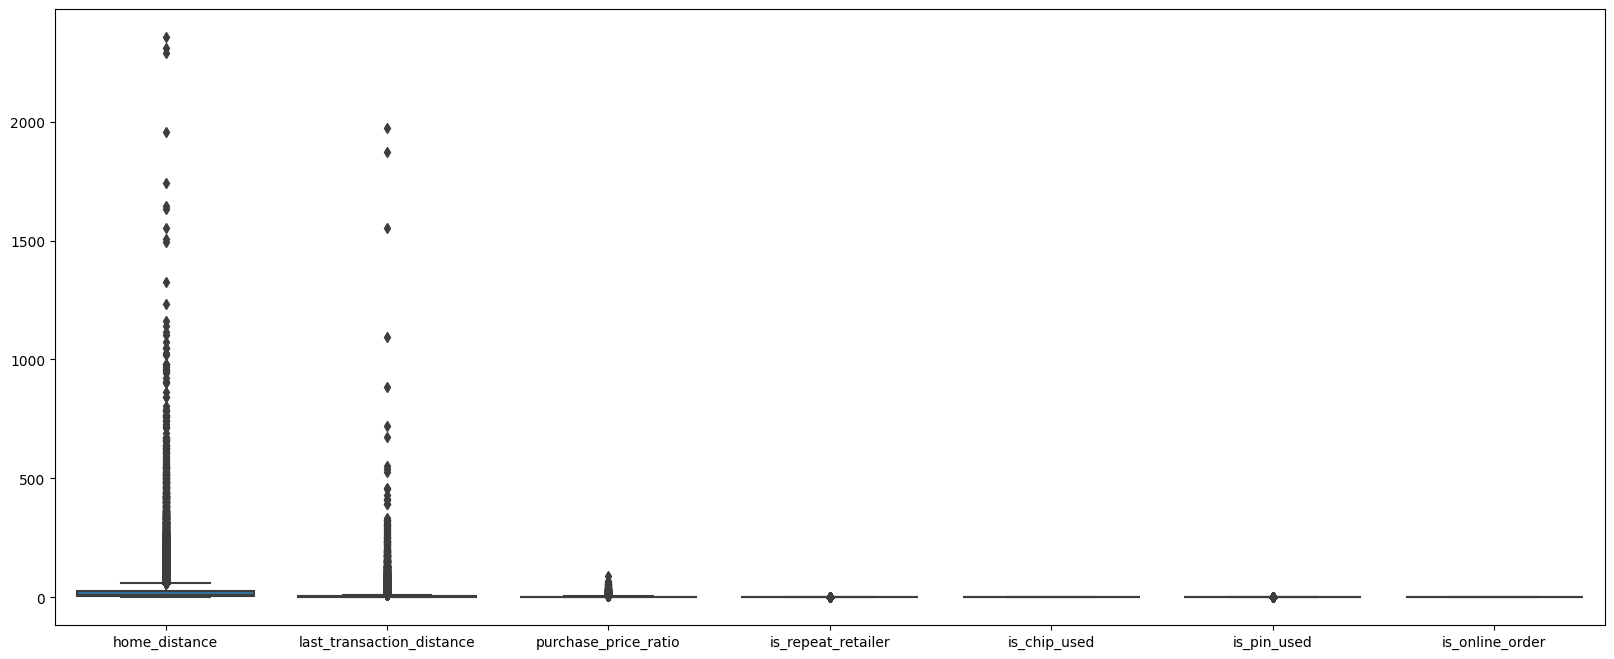

In [316]:
plt.figure(figsize=(20, 8))
sns.boxplot(X_train)

In [317]:
Q1 = X_train['home_distance'].quantile(0.25)
Q3 = X_train['home_distance'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for the outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = X_train[(X_train['home_distance' ]< lower_bound) | (X_train['home_distance'] > upper_bound)]
number_of_outliers = outliers.shape[0]

print(f"Number of outliers in 'home_distance': {number_of_outliers}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Number of outliers in 'home_distance': 4159
Lower bound: -28.828612507155512, Upper bound: 58.36516975130185


In [318]:
Q1 = X_train['last_transaction_distance'].quantile(0.25)
Q3 = X_train['last_transaction_distance'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for the outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = X_train[(X_train['last_transaction_distance' ]< lower_bound) | (X_train['last_transaction_distance'] > upper_bound)]
number_of_outliers = outliers.shape[0]

print(f"Number of outliers in 'last_transaction_distance': {number_of_outliers}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Number of outliers in 'last_transaction_distance': 4936
Lower bound: -4.247486328405658, Upper bound: 7.8588782269566


In [319]:
Q1 = X_train['purchase_price_ratio'].quantile(0.25)
Q3 = X_train['purchase_price_ratio'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for the outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = X_train[(X_train['purchase_price_ratio' ]< lower_bound) | (X_train['purchase_price_ratio'] > upper_bound)]
number_of_outliers = outliers.shape[0]

print(f"Number of outliers in 'purchase_price_ratio': {number_of_outliers}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Number of outliers in 'purchase_price_ratio': 3400
Lower bound: -1.9695837314546312, Upper bound: 4.545825878697817


In [320]:
X_train.columns

Index(['home_distance', 'last_transaction_distance', 'purchase_price_ratio',
       'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order'],
      dtype='object')

## Isolation Forest Method for Outlier Detection

In [321]:
# Outlier Removal using Isolation Forest
isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)

# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_fe) == 1
X_train_inliers = X_train_fe[inliers_train]
y_train_inliers = y_train[inliers_train]

inliers_test = isolation_forest.predict(X_test_fe) == 1
X_test_inliers = X_test_fe[inliers_test]
y_test_inliers = y_test[inliers_test]


In [322]:
X_train_fe[inliers_train]

,home_distance,is_repeat_retailer,is_chip_used,is_pin_used,is_online_order,chip_pin_interaction,online_chip_interaction,high_price_flag,log_last_transaction_distance,log_purchase_price_ratio,log_distance_ratio,log_price_to_distance_ratio,log_total_distance
662359,1.423782,0.0,1.0,0.0,0.0,0.0,0.0,0,0.510243,0.570428,0.617759,0.379589,1.128002
232749,5.540921,1.0,1.0,0.0,1.0,0.0,1.0,0,0.059646,0.296192,1.827785,0.281237,1.887430
624819,14.129902,1.0,0.0,0.0,1.0,0.0,0.0,0,1.169208,0.199488,1.684346,0.066327,2.853555
510853,5.868342,1.0,0.0,0.0,1.0,0.0,0.0,0,0.592441,0.826346,1.445754,0.536814,2.038195
25747,6.818749,1.0,0.0,0.0,1.0,0.0,0.0,0,0.072589,0.814437,1.993519,0.774649,2.066108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655627,27.302662,1.0,1.0,0.0,1.0,0.0,1.0,0,1.852437,0.260555,1.664408,0.045631,3.516845
738006,1.136465,0.0,0.0,0.0,1.0,0.0,0.0,1,0.275074,1.650722,0.622276,1.434638,0.897350
54476,7.904541,1.0,1.0,0.0,0.0,0.0,0.0,1,1.781975,1.755622,0.846030,0.590941,2.628005
745088,1.113122,0.0,0.0,0.0,1.0,0.0,0.0,0,0.623785,0.386617,0.467836,0.225498,1.091621


In [323]:
X_test_fe[inliers_test]

,home_distance,is_repeat_retailer,is_chip_used,is_pin_used,is_online_order,chip_pin_interaction,online_chip_interaction,high_price_flag,log_last_transaction_distance,log_purchase_price_ratio,log_distance_ratio,log_price_to_distance_ratio,log_total_distance
494992,2.146013,1.0,1.0,0.0,0.0,0.0,0.0,0,0.979475,0.104008,0.591029,0.040335,1.570504
550700,3.470587,1.0,0.0,0.0,1.0,0.0,0.0,0,2.381079,0.300037,0.278282,0.031837,2.659361
432400,19.674000,1.0,0.0,0.0,0.0,0.0,0.0,0,0.703004,0.982765,2.374023,0.603068,3.077027
620543,25.802848,1.0,0.0,0.0,1.0,0.0,0.0,0,3.185961,0.155835,0.725929,0.006947,3.911890
833412,23.899081,1.0,0.0,0.0,0.0,0.0,0.0,0,3.570709,0.994183,0.514273,0.046790,4.084982
...,...,...,...,...,...,...,...,...,...,...,...,...,...
364246,16.087564,1.0,0.0,1.0,0.0,0.0,0.0,0,0.489734,0.995771,2.384928,0.715845,2.874663
356285,28.007323,1.0,0.0,1.0,0.0,0.0,0.0,1,0.322977,1.091504,3.057629,0.888959,3.380605
599811,6.535480,1.0,0.0,1.0,0.0,0.0,0.0,1,0.243209,1.081795,1.812301,0.927819,2.055509
277102,6.635843,1.0,1.0,0.0,1.0,0.0,1.0,0,0.181345,0.332864,1.877214,0.284768,2.058559


# Scaling

In [324]:
# Define columns to scale and columns to exclude from scaling
columns_to_exclude = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order',  'chip_pin_interaction',	'online_chip_interaction',	'high_price_flag'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns(X_train_inliers, columns_to_exclude))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])

X_train_scaled= pipeline.fit_transform(X_train_inliers)
X_test_scaled = pipeline.transform(X_test_inliers)


In [327]:
X_train_scaled =pd.DataFrame(X_train_scaled, columns=X_train_inliers.columns)
X_test_scaled =pd.DataFrame(X_test_scaled, columns=X_test_inliers.columns)

In [328]:
X_train_scaled

,home_distance,is_repeat_retailer,is_chip_used,is_pin_used,is_online_order,chip_pin_interaction,online_chip_interaction,high_price_flag,log_last_transaction_distance,log_purchase_price_ratio,log_distance_ratio,log_price_to_distance_ratio,log_total_distance
0,-0.647984,-0.503319,-0.404000,-1.059822,-0.198065,-1.625406,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.509623,-1.015072,-0.939608,0.049925,-0.430340,-0.853321,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.220983,0.245082,-1.128480,-0.081626,-0.937891,0.128905,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.498620,-0.409965,0.095831,-0.300445,0.173253,-0.700044,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.466681,-1.000372,0.072573,0.201924,0.734945,-0.671666,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,0.221700,1.021040,-1.009210,-0.099913,-0.986770,0.803250,1.0,1.0,0.0,1.0,0.0,1.0,0.0
34996,-0.657639,-0.770406,1.705915,-1.055680,2.293634,-1.859903,0.0,0.0,0.0,1.0,0.0,0.0,1.0
34997,-0.430192,0.941015,1.910794,-0.850468,0.301082,-0.100403,1.0,1.0,0.0,0.0,0.0,0.0,1.0
34998,-0.658424,-0.374367,-0.763000,-1.197320,-0.561979,-1.662394,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [329]:
X_train_scaled.columns

Index(['home_distance', 'is_repeat_retailer', 'is_chip_used', 'is_pin_used',
       'is_online_order', 'chip_pin_interaction', 'online_chip_interaction',
       'high_price_flag', 'log_last_transaction_distance',
       'log_purchase_price_ratio', 'log_distance_ratio',
       'log_price_to_distance_ratio', 'log_total_distance'],
      dtype='object')

In [336]:
X_train_scaled.var()

home_distance                    1.000029
is_repeat_retailer               1.000029
is_chip_used                     1.000029
is_pin_used                      1.000029
is_online_order                  1.000029
chip_pin_interaction             1.000029
online_chip_interaction          0.075779
high_price_flag                  0.214544
log_last_transaction_distance    0.049272
log_purchase_price_ratio         0.222791
log_distance_ratio               0.002423
log_price_to_distance_ratio      0.163988
log_total_distance               0.196631
dtype: float64

In [337]:
X_train_scaled.isnull().sum()

home_distance                    0
is_repeat_retailer               0
is_chip_used                     0
is_pin_used                      0
is_online_order                  0
chip_pin_interaction             0
online_chip_interaction          0
high_price_flag                  0
log_last_transaction_distance    0
log_purchase_price_ratio         0
log_distance_ratio               0
log_price_to_distance_ratio      0
log_total_distance               0
dtype: int64

In [338]:
X_train_scaled.head()

,home_distance,is_repeat_retailer,is_chip_used,is_pin_used,is_online_order,chip_pin_interaction,online_chip_interaction,high_price_flag,log_last_transaction_distance,log_purchase_price_ratio,log_distance_ratio,log_price_to_distance_ratio,log_total_distance
0,-0.647984,-0.503319,-0.404000,-1.059822,-0.198065,-1.625406,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.509623,-1.015072,-0.939608,0.049925,-0.430340,-0.853321,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.220983,0.245082,-1.128480,-0.081626,-0.937891,0.128905,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.498620,-0.409965,0.095831,-0.300445,0.173253,-0.700044,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.466681,-1.000372,0.072573,0.201924,0.734945,-0.671666,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## PCA

In [339]:
from sklearn.decomposition import PCA
pca = PCA()

In [340]:
pca.fit(X_train_scaled)

PCA()

In [341]:
pca.explained_variance_ratio_ ## variance/change explained by each principal component

array([3.53681025e-01, 3.08680267e-01, 1.84172823e-01, 5.07926210e-02,
       3.45419715e-02, 3.10951938e-02, 1.12228121e-02, 7.58891726e-03,
       7.06218229e-03, 6.58958005e-03, 4.24441361e-03, 3.28193047e-04,
       1.53277293e-31])

In [342]:
np.cumsum(pca.explained_variance_ratio_) ## cummulative sum of the variances

array([0.35368103, 0.66236129, 0.84653412, 0.89732674, 0.93186871,
       0.9629639 , 0.97418671, 0.98177563, 0.98883781, 0.99542739,
       0.99967181, 1.        , 1.        ])

In [343]:
pca = PCA(n_components=10) # new instantiation to extract the 10 most dominant principal components

X_train_pca = pca.fit_transform(X_train_scaled) # learn the 10 components, and transfor train data

X_test_pca = pca.transform(X_test_scaled) # transform test data based on 10 learned components

## Feature Selection

In [349]:
f, p = f_classif(X_train_pca, y_train_inliers)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca, y_test_inliers)
mi /= np.max(mi) # normalize mi score

Text(0.5, 0, 'features')

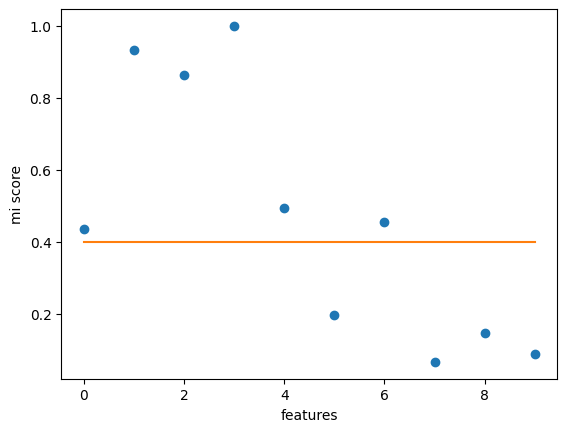

In [352]:
plt.figure()
plt.plot(mi, 'o')
plt.plot(0.4*np.ones(len(mi)))
plt.ylabel('mi score')
plt.xlabel('features')

## find the threshold

Text(0.5, 0, 'features')

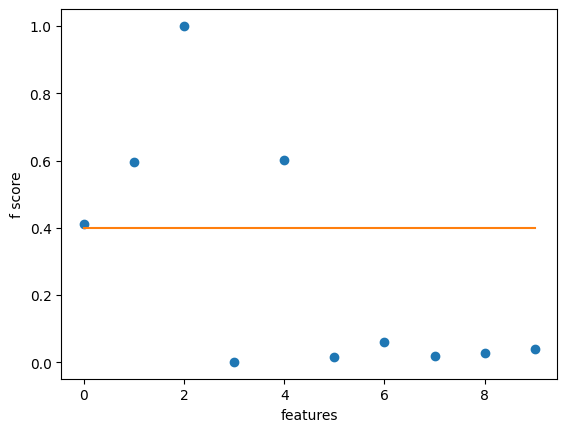

In [353]:
plt.figure()
plt.plot(f, 'o')
plt.plot(0.4*np.ones(len(f)))
plt.ylabel('f score')
plt.xlabel('features')

## find the threshold

In [354]:
X_train_fr =X_train_pca[:,(f > 0.4) | (mi > 0.40)]
X_test_fr= X_test_pca[:,(f > 0.4) | (mi > 0.40)]

In [355]:
X_train_fr[0]

array([-1.9046293 ,  0.24632457, -0.94165097,  0.00606097,  0.252099  ,
        0.09167914])

## 3. Model Training and Testing

In [510]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [356]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def objective_rf(trial):
    # Define hyperparameters to search
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', [1,2,4,7])

    # Define the classifier with suggested hyperparameters
    rfc = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,   # Add max_features here
        random_state=42,
        warm_start=True
    )

    # Train the classifier
    rfc.fit(X_train_fr, y_train_inliers)
    
    # Predict on the test set
    y_pred = rfc.predict(X_test_fr)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_inliers, y_pred)
    return accuracy

# Create an Optuna study to optimize the objective
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50, n_jobs=4)

# Get the best hyperparameters
print(study_rf.best_params)


[I 2024-10-25 14:38:20,545] A new study created in memory with name: no-name-58e7d1f5-d3ee-44a0-82aa-0038a34d7f38
[I 2024-10-25 14:38:25,114] Trial 0 finished with value: 0.9896301417213965 and parameters: {'n_estimators': 59, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 12, 'max_features': 1}. Best is trial 0 with value: 0.9896301417213965.
[I 2024-10-25 14:38:27,052] Trial 1 finished with value: 0.9917041133771172 and parameters: {'n_estimators': 51, 'max_depth': 11, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_features': 2}. Best is trial 1 with value: 0.9917041133771172.
[I 2024-10-25 14:38:28,601] Trial 2 finished with value: 0.9540269616315243 and parameters: {'n_estimators': 65, 'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 14, 'max_features': 7}. Best is trial 1 with value: 0.9917041133771172.
[I 2024-10-25 14:38:29,233] Trial 4 finished with value: 0.9915888927295772 and parameters: {'n_estimators': 53, 'max_depth': 19, 'min_samples_split

{'n_estimators': 88, 'max_depth': 16, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 7}


In [357]:
from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr, y_train_inliers)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)


[I 2024-10-25 14:42:37,216] A new study created in memory with name: no-name-eb2f93a7-4478-4fc4-95ff-915be9c8fa18
[I 2024-10-25 14:42:37,394] Trial 0 finished with value: 0.658716441986404 and parameters: {'C': 0.00016081683772029533, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 480, 'fit_intercept': False, 'l1_ratio': 0.45519717878443544}. Best is trial 0 with value: 0.658716441986404.
[I 2024-10-25 14:42:37,544] Trial 1 finished with value: 0.9555248300495449 and parameters: {'C': 0.008696286099411456, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 412, 'fit_intercept': True, 'l1_ratio': 0.19585030018163896}. Best is trial 1 with value: 0.9555248300495449.
[I 2024-10-25 14:42:37,683] Trial 2 finished with value: 0.9585205668855858 and parameters: {'C': 0.0774529015312529, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 153, 'fit_intercept': True, 'l1_ratio': 0.169812439703528}. Best is trial 2 with value: 0.9585205668855858.
[I 2024-10-25 14:42:37,841] Trial 

{'C': 1.586198819477235, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 289, 'fit_intercept': True, 'l1_ratio': 0.002415214638996993}


In [359]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def objective_decision_tree(trial):
    # Suggest hyperparameters for DecisionTreeClassifier
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', [1,2,3,4,5])
    
    # Create the DecisionTreeClassifier with the suggested hyperparameters
    clf = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr, y_train_inliers)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers, y_pred)
    return accuracy

# Create an Optuna study to optimize the DecisionTreeClassifier
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_decision_tree, n_trials=50, n_jobs=-1)

# Get the best hyperparameters
print(study_dt.best_params)


[I 2024-10-25 14:43:08,412] A new study created in memory with name: no-name-e852d15f-7ac4-4b9a-b058-ee11936e6e9a
[I 2024-10-25 14:43:08,496] Trial 2 finished with value: 0.9413526904021201 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 19, 'min_samples_leaf': 19, 'max_features': 1}. Best is trial 2 with value: 0.9413526904021201.
[I 2024-10-25 14:43:08,517] Trial 5 finished with value: 0.9658946883281484 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 13, 'max_features': 5}. Best is trial 5 with value: 0.9658946883281484.
[I 2024-10-25 14:43:08,542] Trial 3 finished with value: 0.9384721742136191 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 7, 'max_features': 2}. Best is trial 5 with value: 0.9658946883281484.
[I 2024-10-25 14:43:08,560] Trial 7 finished with value: 0.9561009332872451 an

{'criterion': 'gini', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 5}


In [360]:

from sklearn.svm import SVC

def objective_svm(trial):
    # Suggest hyperparameters for SVC
    C = trial.suggest_loguniform('C', 1e-3, 1e2)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    degree = trial.suggest_int('degree', 2, 5) if kernel == 'poly' else 3
    coef0 = trial.suggest_uniform('coef0', 0.0, 1.0) if kernel in ['poly', 'sigmoid'] else 0.0
    
    # Create the SVC model with the sampled hyperparameters
    clf = SVC(
        C=C,
        kernel=kernel,
        gamma=gamma,
        degree=degree,
        coef0=coef0,
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr, y_train_inliers)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers, y_pred)
    return accuracy

# Create an Optuna study to optimize the SVC
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50, n_jobs=-1)

# Get the best hyperparameters
print(study_svm.best_params)


[I 2024-10-25 14:43:15,624] A new study created in memory with name: no-name-d12bbc27-342c-44fa-aab8-c4d67d833e58
[I 2024-10-25 14:43:20,606] Trial 10 finished with value: 0.9958520566885586 and parameters: {'C': 25.068138987015516, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 10 with value: 0.9958520566885586.
[I 2024-10-25 14:43:22,270] Trial 8 finished with value: 0.9873257287705957 and parameters: {'C': 5.282010136366192, 'kernel': 'poly', 'gamma': 'scale', 'degree': 2, 'coef0': 0.7210461355834263}. Best is trial 10 with value: 0.9958520566885586.
[I 2024-10-25 14:43:24,692] Trial 3 finished with value: 0.994123746975458 and parameters: {'C': 3.29229671405775, 'kernel': 'poly', 'gamma': 'auto', 'degree': 4, 'coef0': 0.2696049133949061}. Best is trial 10 with value: 0.9958520566885586.
[I 2024-10-25 14:43:24,761] Trial 2 finished with value: 0.9927410992049776 and parameters: {'C': 0.78408906232626, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 10 with value: 0.99585205668855

{'C': 94.31628991175651, 'kernel': 'poly', 'gamma': 'scale', 'degree': 5, 'coef0': 0.8048733058454267}


In [361]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def objective_knn(trial):
    # Suggest hyperparameters for KNeighborsClassifier
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    p = trial.suggest_int('p', 1, 2)  # 1: Manhattan distance, 2: Euclidean distance
    
    # Create the KNeighborsClassifier with the sampled hyperparameters
    clf = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        p=p
    )

    # Train the classifier
    clf.fit(X_train_fr, y_train_inliers)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers, y_pred)
    return accuracy

# Create an Optuna study to optimize the KNeighborsClassifier
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)

# Get the best hyperparameters
print(study_knn.best_params)


[I 2024-10-25 14:46:01,943] A new study created in memory with name: no-name-ea876d7d-1813-444c-886a-bc5e42b42961
[I 2024-10-25 14:46:02,387] Trial 0 finished with value: 0.9898605830164765 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.9898605830164765.
[I 2024-10-25 14:46:02,546] Trial 1 finished with value: 0.9900910243115566 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 2}. Best is trial 1 with value: 0.9900910243115566.
[I 2024-10-25 14:46:02,806] Trial 2 finished with value: 0.9893997004263164 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 2}. Best is trial 1 with value: 0.9900910243115566.
[I 2024-10-25 14:46:03,126] Trial 3 finished with value: 0.9903214656066367 and parameters: {'n_neighbors': 23, 'weights': 'distance', 'p': 1}. Best is trial 3 with value: 0.9903214656066367.
[I 2024-10-25 14:46:03,300] Trial 4 finished with value: 0.991128010139417 and parameters: {'n_neighbors': 7, 'weights': 

{'n_neighbors': 5, 'weights': 'distance', 'p': 1}


In [362]:
import optuna
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import pandas as pd


# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C= 44.16763423315219, solver= 'saga', penalty= 'elasticnet', max_iter= 500, fit_intercept= True, l1_ratio= 0.8710035911275474),
    "Decision Tree": DecisionTreeClassifier(criterion= 'entropy', splitter= 'best', max_depth= 31, min_samples_split= 2, min_samples_leaf= 2, max_features= 5),
    "SVM": SVC(C= 1.90406211097145, kernel= 'rbf', degree= 3, gamma= 'auto'),
    "KNearest Neighbors": KNeighborsClassifier(n_neighbors= 15, weights= 'distance', p= 2),
    "RandomForest": RandomForestClassifier(n_estimators= 45, max_depth= 17, min_samples_split= 10, min_samples_leaf= 3, max_features= 4)
}

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr, X_test_fr, y_train_inliers, y_test_inliers)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_df


Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating SVM...
Evaluating KNearest Neighbors...
Evaluating RandomForest...


,Train Accuracy,Test Accuracy,Train F1,Test F1,Train AUC,Test AUC
Logistic Regression,0.958543,0.959097,0.680185,0.663507,0.976580,0.975317
Decision Tree,0.998971,0.991474,0.992871,0.935540,0.999992,0.968141
SVM,0.994971,0.993778,0.965217,0.953125,NaN,NaN
KNearest Neighbors,1.000000,0.989976,1.000000,0.925450,1.000000,0.998448
RandomForest,0.999086,0.994239,0.993678,0.956370,0.999990,0.999601


## Comparison of Memorization and Generalization Performance

The table presents the results of different models based on three metrics: classification accuracy, F1 score, and AUC. The goal is to assess how well each model balances memorization (performance on training data) and generalization (performance on test data).

1. Logistic Regression
- Train vs. Test Accuracy: Close (0.9585 vs. 0.9591), indicating good generalization with minimal overfitting.
- F1 Score: Lower than other models but consistent between train and test, which shows balanced handling of classes, given the task's imbalanced nature.
- AUC: High AUC scores on both train (0.9766) and test (0.9753) suggest it’s reliable for distinguishing between classes.
- Reliability: Logistic Regression demonstrates the best generalization, suggesting it’s a reliable choice, especially given its resistance to overfitting.

2. Decision Tree
- Train vs. Test Accuracy: Large difference (0.9990 vs. 0.9915) suggests some overfitting.
- F1 Score: High on training data (0.9929) but lower on test (0.9355), indicating a tendency to memorize the training data.
- AUC: Near perfect on training (0.9999) but lower on test (0.9681), reinforcing that the model might overfit the training data.
- Reliability: Due to its tendency to memorize, Decision Tree is less reliable here for generalization.

3. Support Vector Machine (SVM)
- Accuracy: High on both train (0.9950) and test (0.9938), suggesting robust generalization.
- F1 Score: Also high and balanced (0.9652 on train and 0.9531 on test), supporting good generalization.
- AUC: Not available due to limitations with SVM in calculating probability scores.
- Reliability: SVM is highly reliable for this task due to its consistent high performance across train and test sets, indicating good generalization with limited overfitting.

4. K-Nearest Neighbors (KNN)
- Accuracy: Perfect on train (1.0000) but slightly lower on test (0.9900), suggesting overfitting.
- F1 Score: Shows perfect memorization on training data but drops on the test data (0.9255), indicating overfitting.
- AUC: High on both train and test, but overfitting is still a concern due to its proximity to 1.0000 on training data.
- Reliability: KNN tends to overfit, making it less reliable for generalization in this context.

5. Random Forest
- Accuracy: Near-perfect on both train (0.9991) and test (0.9942), indicating very strong generalization.
- F1 Score: Consistent between train (0.9937) and test (0.9564), suggesting balanced class handling and generalization.
- AUC: Almost perfect on both train and test, indicating excellent discrimination capability.
- Reliability: Random Forest demonstrates the most reliable generalization in this task due to its high consistency across metrics and balanced performance on both train and test sets.

## Conclusion and Recommended Techniques

- Most Reliable Techniques: Logistic Regression, SVM, and Random Forest show the best generalization and balanced performance.
- Reasoning:
> - Logistic Regression performs well across all metrics, demonstrating strong generalization with minimal overfitting, making it suitable for imbalanced data.
> - SVM shows robust performance in both accuracy and F1 scores without overfitting, making it highly reliable for generalization.
> - Random Forest combines high accuracy and F1 scores, with excellent AUC, indicating that it captures complex patterns while still generalizing effectively.

In this context, Logistic Regression, SVM, and Random Forest are reliable for fraud detection due to their ability to handle imbalanced data while maintaining consistent performance across all metrics on both training and test sets.

## 4. Additional Analysis

In [363]:
X_train.head()

,home_distance,last_transaction_distance,purchase_price_ratio,is_repeat_retailer,is_chip_used,is_pin_used,is_online_order
662359,1.423782,0.665696,0.769024,0.0,1.0,0.0,0.0
579052,126.156667,0.822409,2.341673,1.0,1.0,0.0,0.0
232749,5.540921,0.061460,0.344728,1.0,1.0,0.0,1.0
624819,14.129902,2.219443,0.220778,1.0,0.0,0.0,1.0
510853,5.868342,0.808397,1.284953,1.0,0.0,0.0,1.0


In [491]:
results_features=[]

#### Adding Feature 'distance_ratio'

In [492]:
feature='distance_ratio'
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()
y_train_1 = y_train.copy()
y_test_1 = y_test.copy() 
X_train_1['distance_ratio'] = X_train_1['home_distance'] / (X_train_1['last_transaction_distance'] + 1)
X_test_1['distance_ratio'] = X_test_1['home_distance'] / (X_test_1['last_transaction_distance'] + 1)

isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)
# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_1) == 1
X_train_inliers1 = X_train_1[inliers_train]
y_train_inliers1 = y_train_1[inliers_train]

inliers_test = isolation_forest.predict(X_test_1) == 1
X_test_inliers1 = X_test_1[inliers_test]
y_test_inliers1 = y_test_1[inliers_test]



In [493]:
# Define columns to scale and columns to exclude from scaling
columns_to_exclude1 = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns1(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns1(X_train_inliers1, columns_to_exclude1))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])


X_train_scaled_1= pipeline.fit_transform(X_train_inliers1)
X_test_scaled_1 = pipeline.transform(X_test_inliers1)


In [494]:
pca = PCA()

pca.fit(X_train_scaled_1)

np.cumsum(pca.explained_variance_ratio_) 



array([0.40019396, 0.62523476, 0.83769634, 0.88644827, 0.93420438,
       0.9729587 , 0.98820541, 1.        ])

In [495]:
pca = PCA(n_components=7) # new instantiation to extract the 10 most dominant principal components

X_train_pca1 = pca.fit_transform(X_train_scaled_1) # learn the 10 components, and transfor train data

X_test_pca1 = pca.transform(X_test_scaled_1) # transform test data based on 10 learned components


f, p = f_classif(X_train_pca1, y_train_inliers1)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca1, y_test_inliers1)
mi /= np.max(mi) # normalize mi score

In [496]:
X_train_fr1 =X_train_pca1[:,(f > 0.4) | (mi > 0.40)]
X_test_fr1= X_test_pca1[:,(f > 0.4) | (mi > 0.40)]
X_train_fr1[0]

array([ 0.09404699, -0.88358351, -0.71580146,  0.19670159, -0.0357182 ])

In [497]:
from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr1, y_train_inliers1)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr1)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers1, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)

[I 2024-10-25 16:40:51,381] A new study created in memory with name: no-name-41b35f15-56df-41c0-adf6-6b313fd71c36
[I 2024-10-25 16:40:51,439] Trial 0 finished with value: 0.7145823719427781 and parameters: {'C': 8.06737597947639, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 312, 'fit_intercept': False, 'l1_ratio': 0.23384353433450022}. Best is trial 0 with value: 0.7145823719427781.
[I 2024-10-25 16:40:51,496] Trial 1 finished with value: 0.7145823719427781 and parameters: {'C': 7.532671100246579, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 390, 'fit_intercept': False, 'l1_ratio': 0.15839339303043598}. Best is trial 0 with value: 0.7145823719427781.
[I 2024-10-25 16:40:51,551] Trial 2 finished with value: 0.7145823719427781 and parameters: {'C': 21.24795518881133, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 381, 'fit_intercept': False, 'l1_ratio': 0.663771554854522}. Best is trial 0 with value: 0.7145823719427781.
[I 2024-10-25 16:40:51,856] Trial 3 fini

{'C': 2.055182617368359, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 247, 'fit_intercept': True, 'l1_ratio': 0.4681167861968818}


In [498]:
import optuna
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import pandas as pd


# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C=  2.055182617368359, solver= 'saga', penalty= 'elasticnet', 
                                              max_iter= 247, fit_intercept= True, l1_ratio= 0.4681167861968818) }

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr1, X_test_fr1, y_train_inliers1, y_test_inliers1)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_features.append({
        'Feature': feature,
        'Train Accuracy': results_df['Train Accuracy'].values[0],
        'Test Accuracy': results_df['Test Accuracy'].values[0],
        'Train F1': results_df['Train F1'].values[0],
        'Test F1': results_df['Test F1'].values[0],
        'Train AUC': results_df['Train AUC'].values[0],
        'Test AUC': results_df['Test AUC'].values[0]
    })

Evaluating Logistic Regression...


### Adding Feature  'price_to_distance_ratio'

In [499]:
feature='price_to_distance_ratio'
X_train_1[feature] = X_train_1['purchase_price_ratio'] / (X_train_1['last_transaction_distance'] + 1)
X_test_1[feature] = X_test_1['purchase_price_ratio'] / (X_test_1['last_transaction_distance'] + 1)

isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)
# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_1) == 1
X_train_inliers1 = X_train_1[inliers_train]
y_train_inliers1 = y_train_1[inliers_train]

inliers_test = isolation_forest.predict(X_test_1) == 1
X_test_inliers1 = X_test_1[inliers_test]
y_test_inliers1 = y_test_1[inliers_test]

# Define columns to scale and columns to exclude from scaling
columns_to_exclude1 = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns1(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns1(X_train_inliers1, columns_to_exclude1))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])


X_train_scaled_1= pipeline.fit_transform(X_train_inliers1)
X_test_scaled_1 = pipeline.transform(X_test_inliers1)



In [500]:
pca = PCA()

pca.fit(X_train_scaled_1)

np.cumsum(pca.explained_variance_ratio_) 



array([0.32963948, 0.65006954, 0.8285298 , 0.87350044, 0.91350535,
       0.95244572, 0.97732905, 0.98986657, 1.        ])

In [501]:

pca = PCA(n_components=8) # new instantiation to extract the 10 most dominant principal components

X_train_pca1 = pca.fit_transform(X_train_scaled_1) # learn the 10 components, and transfor train data

X_test_pca1 = pca.transform(X_test_scaled_1) # transform test data based on 10 learned components


f, p = f_classif(X_train_pca1, y_train_inliers1)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca1, y_test_inliers1)
mi /= np.max(mi) # normalize mi score


X_train_fr1 =X_train_pca1[:,(f > 0.4) | (mi > 0.40)]
X_test_fr1= X_test_pca1[:,(f > 0.4) | (mi > 0.40)]
X_train_fr1[0]

from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr1, y_train_inliers1)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr1)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers1, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)



[I 2024-10-25 16:42:14,190] A new study created in memory with name: no-name-64b918a8-bba0-4dd7-8559-a5ef3c546c91
[I 2024-10-25 16:42:14,270] Trial 0 finished with value: 0.6884699390734568 and parameters: {'C': 0.1848803530714432, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 172, 'fit_intercept': False, 'l1_ratio': 0.24972173859922098}. Best is trial 0 with value: 0.6884699390734568.
[I 2024-10-25 16:42:14,295] Trial 1 finished with value: 0.9372341648465341 and parameters: {'C': 0.00010656981981947868, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 187, 'fit_intercept': True, 'l1_ratio': 0.6156230728069697}. Best is trial 1 with value: 0.9372341648465341.
[I 2024-10-25 16:42:14,372] Trial 2 finished with value: 0.6882400275893781 and parameters: {'C': 0.5843351787099893, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 292, 'fit_intercept': False, 'l1_ratio': 0.8634384452963266}. Best is trial 1 with value: 0.9372341648465341.
[I 2024-10-25 16:42:15,481] Trial

{'C': 46.24686850158835, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 260, 'fit_intercept': True, 'l1_ratio': 0.7453732655305779}


In [502]:
import optuna
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import pandas as pd


# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C= 46.24686850158835, solver= 'saga', penalty= 'elasticnet', 
                                              max_iter= 260, fit_intercept= True, l1_ratio=0.7453732655305779) }

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr1, X_test_fr1, y_train_inliers1, y_test_inliers1)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_features.append({
        'Feature': feature,
        'Train Accuracy': results_df['Train Accuracy'].values[0],
        'Test Accuracy': results_df['Test Accuracy'].values[0],
        'Train F1': results_df['Train F1'].values[0],
        'Test F1': results_df['Test F1'].values[0],
        'Train AUC': results_df['Train AUC'].values[0],
        'Test AUC': results_df['Test AUC'].values[0]
    })

Evaluating Logistic Regression...


In [503]:
results_features

[{'Feature': 'distance_ratio',
  'Train Accuracy': 0.9742731887401939,
  'Test Accuracy': 0.9651731205019216,
  'Train F1': 0.7794263105835806,
  'Test F1': 0.9735428571428572,
  'Train AUC': 0.9669395970113183,
  'Test AUC': 0.7882944673068131},
 {'Feature': 'price_to_distance_ratio',
  'Train Accuracy': 0.9787331877227268,
  'Test Accuracy': 0.993601537266446,
  'Train F1': 0.8222862632084533,
  'Test F1': 0.9763714285714286,
  'Train AUC': 0.9923757131672676,
  'Test AUC': 0.811574390521759}]

### Adding Feature 'chip_pin_interaction'

In [504]:
feature='chip_pin_interaction'
X_train_1[feature] = X_train_1['is_chip_used'] * X_train_1['is_pin_used']
X_test_1[feature] = X_test_1['is_chip_used'] * X_test_1['is_pin_used']

isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)
# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_1) == 1
X_train_inliers1 = X_train_1[inliers_train]
y_train_inliers1 = y_train_1[inliers_train]

inliers_test = isolation_forest.predict(X_test_1) == 1
X_test_inliers1 = X_test_1[inliers_test]
y_test_inliers1 = y_test_1[inliers_test]

# Define columns to scale and columns to exclude from scaling
columns_to_exclude1 = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order','chip_pin_interaction'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns1(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns1(X_train_inliers1, columns_to_exclude1))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])


X_train_scaled_1= pipeline.fit_transform(X_train_inliers1)
X_test_scaled_1 = pipeline.transform(X_test_inliers1)


In [505]:
pca = PCA()

pca.fit(X_train_scaled_1)

np.cumsum(pca.explained_variance_ratio_) 

array([0.33045335, 0.65060743, 0.82984351, 0.87425877, 0.91423147,
       0.95322353, 0.97818395, 0.99045253, 0.99918893, 1.        ])

In [506]:
pca = PCA(n_components=9) # new instantiation to extract the 10 most dominant principal components

X_train_pca1 = pca.fit_transform(X_train_scaled_1) # learn the 10 components, and transfor train data

X_test_pca1 = pca.transform(X_test_scaled_1) # transform test data based on 10 learned components


f, p = f_classif(X_train_pca1, y_train_inliers1)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca1, y_test_inliers1)
mi /= np.max(mi) # normalize mi score


X_train_fr1 =X_train_pca1[:,(f > 0.4) | (mi > 0.40)]
X_test_fr1= X_test_pca1[:,(f > 0.4) | (mi > 0.40)]
X_train_fr1[0]

from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr1, y_train_inliers1)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr1)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers1, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)

[I 2024-10-25 16:44:11,297] A new study created in memory with name: no-name-3ebce879-fca0-4934-a67f-16f09b2b65ed
[I 2024-10-25 16:44:11,369] Trial 0 finished with value: 0.9651456088053199 and parameters: {'C': 0.008266665805961042, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 118, 'fit_intercept': True, 'l1_ratio': 0.6148558104260864}. Best is trial 0 with value: 0.9651456088053199.
[I 2024-10-25 16:44:11,426] Trial 1 finished with value: 0.9390048154093098 and parameters: {'C': 0.0002991475581266666, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 164, 'fit_intercept': True, 'l1_ratio': 0.19645793349183072}. Best is trial 0 with value: 0.9651456088053199.
[I 2024-10-25 16:44:11,488] Trial 2 finished with value: 0.7007567071772529 and parameters: {'C': 0.0018436561066768567, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 231, 'fit_intercept': False, 'l1_ratio': 0.18632391935672354}. Best is trial 0 with value: 0.9651456088053199.
[I 2024-10-25 16:44:11,545] T

{'C': 53.21169241665765, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 470, 'fit_intercept': True, 'l1_ratio': 0.9719767840275757}


In [507]:
import optuna
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import pandas as pd


# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C= 53.21169241665765, solver= 'saga', penalty= 'elasticnet', 
                                              max_iter= 470, fit_intercept= True, l1_ratio= 0.9719767840275757) }

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr1, X_test_fr1, y_train_inliers1, y_test_inliers1)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_features.append({
        'Feature': feature,
        'Train Accuracy': results_df['Train Accuracy'].values[0],
        'Test Accuracy': results_df['Test Accuracy'].values[0],
        'Train F1': results_df['Train F1'].values[0],
        'Test F1': results_df['Test F1'].values[0],
        'Train AUC': results_df['Train AUC'].values[0],
        'Test AUC': results_df['Test AUC'].values[0]
    })

Evaluating Logistic Regression...


## Adding Feature 'online_chip_interaction'

In [508]:
feature='online_chip_interaction'
X_train_1[feature] =  X_train_1['is_online_order'] * X_train_1['is_chip_used']
X_test_1[feature] = X_test_1['is_online_order'] * X_test_1['is_chip_used'] 

isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)
# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_1) == 1
X_train_inliers1 = X_train_1[inliers_train]
y_train_inliers1 = y_train_1[inliers_train]

inliers_test = isolation_forest.predict(X_test_1) == 1
X_test_inliers1 = X_test_1[inliers_test]
y_test_inliers1 = y_test_1[inliers_test]

# Define columns to scale and columns to exclude from scaling
columns_to_exclude1 = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns1(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns1(X_train_inliers1, columns_to_exclude1))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])


X_train_scaled_1= pipeline.fit_transform(X_train_inliers1)
X_test_scaled_1 = pipeline.transform(X_test_inliers1)

In [509]:

pca = PCA()

pca.fit(X_train_scaled_1)

np.cumsum(pca.explained_variance_ratio_) 

array([0.24317183, 0.4792843 , 0.63921089, 0.77046228, 0.89648066,
       0.9294406 , 0.95862796, 0.97685177, 0.98687973, 0.99414427,
       1.        ])

In [510]:
pca = PCA(n_components=10) # new instantiation to extract the 10 most dominant principal components

X_train_pca1 = pca.fit_transform(X_train_scaled_1) # learn the 10 components, and transfor train data

X_test_pca1 = pca.transform(X_test_scaled_1) # transform test data based on 10 learned components


f, p = f_classif(X_train_pca1, y_train_inliers1)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca1, y_test_inliers1)
mi /= np.max(mi) # normalize mi score


X_train_fr1 =X_train_pca1[:,(f > 0.4) | (mi > 0.40)]
X_test_fr1= X_test_pca1[:,(f > 0.4) | (mi > 0.40)]
X_train_fr1[0]

from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr1, y_train_inliers1)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr1)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers1, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)


[I 2024-10-25 16:45:55,961] A new study created in memory with name: no-name-cf1c3da2-2f38-47ad-bd3b-423913e38425
[I 2024-10-25 16:45:56,045] Trial 0 finished with value: 0.68359375 and parameters: {'C': 0.962582888382727, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 375, 'fit_intercept': False, 'l1_ratio': 0.9763273097658128}. Best is trial 0 with value: 0.68359375.
[I 2024-10-25 16:45:56,122] Trial 1 finished with value: 0.68359375 and parameters: {'C': 0.016454827871470814, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 289, 'fit_intercept': False, 'l1_ratio': 0.24449758498654794}. Best is trial 0 with value: 0.68359375.
[I 2024-10-25 16:45:57,250] Trial 2 finished with value: 0.9802389705882353 and parameters: {'C': 1.5455679979645174, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 230, 'fit_intercept': True, 'l1_ratio': 0.15331711890256094}. Best is trial 2 with value: 0.9802389705882353.
[I 2024-10-25 16:45:57,332] Trial 3 finished with value: 0.68359375

{'C': 1.5455679979645174, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 230, 'fit_intercept': True, 'l1_ratio': 0.15331711890256094}


In [511]:
# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C= 1.5455679979645174, solver= 'saga', penalty= 'elasticnet', 
                                              max_iter= 230, fit_intercept= True, l1_ratio= 0.15331711890256094) }

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr1, X_test_fr1, y_train_inliers1, y_test_inliers1)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_features.append({
        'Feature': feature,
        'Train Accuracy': results_df['Train Accuracy'].values[0],
        'Test Accuracy': results_df['Test Accuracy'].values[0],
        'Train F1': results_df['Train F1'].values[0],
        'Test F1': results_df['Test F1'].values[0],
        'Train AUC': results_df['Train AUC'].values[0],
        'Test AUC': results_df['Test AUC'].values[0]
    })

Evaluating Logistic Regression...


## Adding Feature 'total_distance'

In [512]:
feature='total_distance'
X_train_1[feature] = X_train_1['home_distance'] + X_train_1['last_transaction_distance']
X_test_1[feature] = X_test_1['home_distance'] + X_test_1['last_transaction_distance']

isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)
# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_1) == 1
X_train_inliers1 = X_train_1[inliers_train]
y_train_inliers1 = y_train_1[inliers_train]

inliers_test = isolation_forest.predict(X_test_1) == 1
X_test_inliers1 = X_test_1[inliers_test]
y_test_inliers1 = y_test_1[inliers_test]

# Define columns to scale and columns to exclude from scaling
columns_to_exclude1 = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns1(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns1(X_train_inliers1, columns_to_exclude1))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])


X_train_scaled_1= pipeline.fit_transform(X_train_inliers1)
X_test_scaled_1 = pipeline.transform(X_test_inliers1)

In [513]:
pca = PCA()

pca.fit(X_train_scaled_1)

np.cumsum(pca.explained_variance_ratio_) 

array([0.30943716, 0.52187656, 0.66320721, 0.79309637, 0.90575899,
       0.93564582, 0.96142075, 0.97949172, 0.98825737, 0.9947088 ,
       1.        , 1.        ])

In [515]:
pca = PCA(n_components=10) # new instantiation to extract the 10 most dominant principal components

X_train_pca1 = pca.fit_transform(X_train_scaled_1) # learn the 10 components, and transfor train data

X_test_pca1 = pca.transform(X_test_scaled_1) # transform test data based on 10 learned components


f, p = f_classif(X_train_pca1, y_train_inliers1)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca1, y_test_inliers1)
mi /= np.max(mi) # normalize mi score


X_train_fr1 =X_train_pca1[:,(f > 0.4) | (mi > 0.40)]
X_test_fr1= X_test_pca1[:,(f > 0.4) | (mi > 0.40)]
X_train_fr1[0]

from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr1, y_train_inliers1)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr1)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers1, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)


[I 2024-10-25 16:47:46,850] A new study created in memory with name: no-name-a08363be-60a9-4978-8855-12e1236646fb
[I 2024-10-25 16:47:46,921] Trial 0 finished with value: 0.7067816091954023 and parameters: {'C': 0.004637253907901151, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 330, 'fit_intercept': False, 'l1_ratio': 0.8274269748470819}. Best is trial 0 with value: 0.7067816091954023.
[I 2024-10-25 16:47:46,997] Trial 1 finished with value: 0.7050574712643678 and parameters: {'C': 0.04394338347052121, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 372, 'fit_intercept': False, 'l1_ratio': 0.4283098747360461}. Best is trial 0 with value: 0.7067816091954023.
[I 2024-10-25 16:47:47,073] Trial 2 finished with value: 0.7041379310344827 and parameters: {'C': 3.7506523860263195, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 419, 'fit_intercept': False, 'l1_ratio': 0.5543584918270643}. Best is trial 0 with value: 0.7067816091954023.
[I 2024-10-25 16:47:47,138] Trial 

{'C': 93.66721670872728, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 166, 'fit_intercept': True, 'l1_ratio': 0.29868650686680537}


In [516]:
# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C= 93.66721670872728, solver= 'saga', penalty= 'elasticnet', 
                                              max_iter= 166, fit_intercept= True, l1_ratio=  0.29868650686680537) }

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr1, X_test_fr1, y_train_inliers1, y_test_inliers1)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_features.append({
        'Feature': feature,
        'Train Accuracy': results_df['Train Accuracy'].values[0],
        'Test Accuracy': results_df['Test Accuracy'].values[0],
        'Train F1': results_df['Train F1'].values[0],
        'Test F1': results_df['Test F1'].values[0],
        'Train AUC': results_df['Train AUC'].values[0],
        'Test AUC': results_df['Test AUC'].values[0]
    })

Evaluating Logistic Regression...


## Adding Feature 'high_price_flag'

In [517]:
feature='high_price_flag'
X_train_1[feature] = (X_train_1['purchase_price_ratio'] > 1.8).astype(int)
X_test_1[feature] = (X_test_1['purchase_price_ratio'] > 1.8).astype(int)

isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)
# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_1) == 1
X_train_inliers1 = X_train_1[inliers_train]
y_train_inliers1 = y_train_1[inliers_train]

inliers_test = isolation_forest.predict(X_test_1) == 1
X_test_inliers1 = X_test_1[inliers_test]
y_test_inliers1 = y_test_1[inliers_test]

# Define columns to scale and columns to exclude from scaling
columns_to_exclude1 = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns1(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns1(X_train_inliers1, columns_to_exclude1))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])


X_train_scaled_1= pipeline.fit_transform(X_train_inliers1)
X_test_scaled_1 = pipeline.transform(X_test_inliers1)




In [518]:

pca = PCA()

pca.fit(X_train_scaled_1)

np.cumsum(pca.explained_variance_ratio_) 


array([0.28055845, 0.53317953, 0.66159332, 0.78234334, 0.88134571,
       0.92015823, 0.94408484, 0.96714032, 0.98193531, 0.9895984 ,
       0.99531849, 1.        , 1.        ])

In [519]:


pca = PCA(n_components=11) # new instantiation to extract the 10 most dominant principal components

X_train_pca1 = pca.fit_transform(X_train_scaled_1) # learn the 10 components, and transfor train data

X_test_pca1 = pca.transform(X_test_scaled_1) # transform test data based on 10 learned components


f, p = f_classif(X_train_pca1, y_train_inliers1)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca1, y_test_inliers1)
mi /= np.max(mi) # normalize mi score


X_train_fr1 =X_train_pca1[:,(f > 0.4) | (mi > 0.40)]
X_test_fr1= X_test_pca1[:,(f > 0.4) | (mi > 0.40)]
X_train_fr1[0]

from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr1, y_train_inliers1)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr1)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers1, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)







[I 2024-10-25 16:49:31,138] A new study created in memory with name: no-name-292ec725-7960-4232-a6b4-6aa78b056fad
[I 2024-10-25 16:49:31,217] Trial 0 finished with value: 0.7252179899036255 and parameters: {'C': 0.002595447728920157, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 248, 'fit_intercept': False, 'l1_ratio': 0.6866372071211452}. Best is trial 0 with value: 0.7252179899036255.
[I 2024-10-25 16:49:31,296] Trial 1 finished with value: 0.713515374024782 and parameters: {'C': 1.65767535293469, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 275, 'fit_intercept': False, 'l1_ratio': 0.41998558139353837}. Best is trial 0 with value: 0.7252179899036255.
[I 2024-10-25 16:49:31,375] Trial 2 finished with value: 0.713630105553006 and parameters: {'C': 0.03517864887688591, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 477, 'fit_intercept': False, 'l1_ratio': 0.8139075169438595}. Best is trial 0 with value: 0.7252179899036255.
[I 2024-10-25 16:49:31,593] Trial 3 f

{'C': 6.566349382889067, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 369, 'fit_intercept': True, 'l1_ratio': 0.9716600965569603}


In [520]:
# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C= 6.566349382889067, solver= 'saga', penalty= 'elasticnet', 
                                              max_iter= 369, fit_intercept= True, l1_ratio= 0.9716600965569603) }

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr1, X_test_fr1, y_train_inliers1, y_test_inliers1)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_features.append({
        'Feature': feature,
        'Train Accuracy': results_df['Train Accuracy'].values[0],
        'Test Accuracy': results_df['Test Accuracy'].values[0],
        'Train F1': results_df['Train F1'].values[0],
        'Test F1': results_df['Test F1'].values[0],
        'Train AUC': results_df['Train AUC'].values[0],
        'Test AUC': results_df['Test AUC'].values[0]
    })

Evaluating Logistic Regression...


### Applying log Tranformation on 'last_transaction_distance'

In [521]:
feature='log_last_transaction_distance'
X_train_1[feature] = np.log(X_train_1['last_transaction_distance'] + 1)
X_test_1[feature] = np.log(X_test_1['last_transaction_distance'] + 1)

isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)
# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_1) == 1
X_train_inliers1 = X_train_1[inliers_train]
y_train_inliers1 = y_train_1[inliers_train]

inliers_test = isolation_forest.predict(X_test_1) == 1
X_test_inliers1 = X_test_1[inliers_test]
y_test_inliers1 = y_test_1[inliers_test]

# Define columns to scale and columns to exclude from scaling
columns_to_exclude1 = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns1(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns1(X_train_inliers1, columns_to_exclude1))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])


X_train_scaled_1= pipeline.fit_transform(X_train_inliers1)
X_test_scaled_1 = pipeline.transform(X_test_inliers1)













In [522]:



pca = PCA()

pca.fit(X_train_scaled_1)

np.cumsum(pca.explained_variance_ratio_) 

array([0.25736419, 0.49957178, 0.67887446, 0.79064488, 0.88315881,
       0.91824416, 0.941496  , 0.96246586, 0.97561058, 0.98327822,
       0.99052202, 0.99576332, 1.        , 1.        ])

In [523]:

pca = PCA(n_components=11) # new instantiation to extract the 10 most dominant principal components

X_train_pca1 = pca.fit_transform(X_train_scaled_1) # learn the 10 components, and transfor train data

X_test_pca1 = pca.transform(X_test_scaled_1) # transform test data based on 10 learned components


f, p = f_classif(X_train_pca1, y_train_inliers1)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca1, y_test_inliers1)
mi /= np.max(mi) # normalize mi score


X_train_fr1 =X_train_pca1[:,(f > 0.4) | (mi > 0.40)]
X_test_fr1= X_test_pca1[:,(f > 0.4) | (mi > 0.40)]
X_train_fr1[0]

from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr1, y_train_inliers1)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr1)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers1, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)

[I 2024-10-25 16:51:06,858] A new study created in memory with name: no-name-63481c55-2701-4184-9c00-7785b8b7fadd
[I 2024-10-25 16:51:06,936] Trial 0 finished with value: 0.7067876421270243 and parameters: {'C': 26.895154932601656, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 237, 'fit_intercept': False, 'l1_ratio': 0.07343653170585673}. Best is trial 0 with value: 0.7067876421270243.
[I 2024-10-25 16:51:07,018] Trial 1 finished with value: 0.7104628459859883 and parameters: {'C': 0.002129479530668826, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 457, 'fit_intercept': False, 'l1_ratio': 0.2041357535671532}. Best is trial 1 with value: 0.7104628459859883.
[I 2024-10-25 16:51:07,096] Trial 2 finished with value: 0.706557941885839 and parameters: {'C': 0.10633128949052192, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 372, 'fit_intercept': False, 'l1_ratio': 0.27143934397309666}. Best is trial 1 with value: 0.7104628459859883.
[I 2024-10-25 16:51:07,172] Trial

{'C': 8.840419169932591, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 321, 'fit_intercept': True, 'l1_ratio': 0.01280958687720539}


In [524]:

# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C= 8.840419169932591, solver= 'saga', penalty= 'elasticnet', 
                                              max_iter= 321, fit_intercept= True, l1_ratio= 0.01280958687720539) }

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr1, X_test_fr1, y_train_inliers1, y_test_inliers1)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_features.append({
        'Feature': feature,
        'Train Accuracy': results_df['Train Accuracy'].values[0],
        'Test Accuracy': results_df['Test Accuracy'].values[0],
        'Train F1': results_df['Train F1'].values[0],
        'Test F1': results_df['Test F1'].values[0],
        'Train AUC': results_df['Train AUC'].values[0],
        'Test AUC': results_df['Test AUC'].values[0]
    })

Evaluating Logistic Regression...


## Applying log transformation on ''purchase_price_ratio''

In [525]:
feature='log_purchase_price_ratio'
X_train_1[feature] = np.log(X_train_1['purchase_price_ratio'] + 1)
X_test_1[feature] = np.log(X_test_1['purchase_price_ratio'] + 1)

isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)
# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_1) == 1
X_train_inliers1 = X_train_1[inliers_train]
y_train_inliers1 = y_train_1[inliers_train]

inliers_test = isolation_forest.predict(X_test_1) == 1
X_test_inliers1 = X_test_1[inliers_test]
y_test_inliers1 = y_test_1[inliers_test]

# Define columns to scale and columns to exclude from scaling
columns_to_exclude1 = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns1(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns1(X_train_inliers1, columns_to_exclude1))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])


X_train_scaled_1= pipeline.fit_transform(X_train_inliers1)
X_test_scaled_1 = pipeline.transform(X_test_inliers1)



In [526]:
pca = PCA()

pca.fit(X_train_scaled_1)

np.cumsum(pca.explained_variance_ratio_) 




array([0.29531287, 0.5279186 , 0.70062234, 0.80594225, 0.8872248 ,
       0.91919825, 0.94087526, 0.96005053, 0.97296377, 0.98076915,
       0.98737661, 0.99215423, 0.99624331, 1.        , 1.        ])

In [527]:




pca = PCA(n_components=12) # new instantiation to extract the 10 most dominant principal components

X_train_pca1 = pca.fit_transform(X_train_scaled_1) # learn the 10 components, and transfor train data

X_test_pca1 = pca.transform(X_test_scaled_1) # transform test data based on 10 learned components


f, p = f_classif(X_train_pca1, y_train_inliers1)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca1, y_test_inliers1)
mi /= np.max(mi) # normalize mi score


X_train_fr1 =X_train_pca1[:,(f > 0.4) | (mi > 0.40)]
X_test_fr1= X_test_pca1[:,(f > 0.4) | (mi > 0.40)]
X_train_fr1[0]

from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr1, y_train_inliers1)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr1)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers1, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)





[I 2024-10-25 16:53:05,085] A new study created in memory with name: no-name-c5167179-3155-4349-b7fd-8ad0bdd8eb01
[I 2024-10-25 16:53:05,185] Trial 0 finished with value: 0.6585085602665748 and parameters: {'C': 0.046820325693360795, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 458, 'fit_intercept': False, 'l1_ratio': 0.30250020148595314}. Best is trial 0 with value: 0.6585085602665748.
[I 2024-10-25 16:53:05,239] Trial 1 finished with value: 0.9364586924049179 and parameters: {'C': 0.0003943225572646826, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 202, 'fit_intercept': True, 'l1_ratio': 0.8739108582191716}. Best is trial 1 with value: 0.9364586924049179.
[I 2024-10-25 16:53:05,291] Trial 2 finished with value: 0.9366884982190049 and parameters: {'C': 0.0002759140795440454, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 393, 'fit_intercept': True, 'l1_ratio': 0.5722014439977263}. Best is trial 2 with value: 0.9366884982190049.
[I 2024-10-25 16:53:05,397] Tr

{'C': 19.173987110178206, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 148, 'fit_intercept': True, 'l1_ratio': 0.30487212761244714}


In [528]:
# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C= 19.173987110178206, solver= 'saga', penalty= 'elasticnet', 
                                              max_iter= 148, fit_intercept= True, l1_ratio= 0.30487212761244714) }

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr1, X_test_fr1, y_train_inliers1, y_test_inliers1)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_features.append({
        'Feature': feature,
        'Train Accuracy': results_df['Train Accuracy'].values[0],
        'Test Accuracy': results_df['Test Accuracy'].values[0],
        'Train F1': results_df['Train F1'].values[0],
        'Test F1': results_df['Test F1'].values[0],
        'Train AUC': results_df['Train AUC'].values[0],
        'Test AUC': results_df['Test AUC'].values[0]
    })

Evaluating Logistic Regression...


## Applying Log Transformation on 'distance_ratio''

In [529]:
feature='log_distance_ratio'
X_train_1[feature] = np.log(X_train_1['distance_ratio'] + 1)
X_test_1[feature] = np.log(X_test_1['distance_ratio'] + 1)

isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)
# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_1) == 1
X_train_inliers1 = X_train_1[inliers_train]
y_train_inliers1 = y_train_1[inliers_train]

inliers_test = isolation_forest.predict(X_test_1) == 1
X_test_inliers1 = X_test_1[inliers_test]
y_test_inliers1 = y_test_1[inliers_test]

# Define columns to scale and columns to exclude from scaling
columns_to_exclude1 = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns1(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns1(X_train_inliers1, columns_to_exclude1))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])


X_train_scaled_1= pipeline.fit_transform(X_train_inliers1)
X_test_scaled_1 = pipeline.transform(X_test_inliers1)


In [530]:





pca = PCA()

pca.fit(X_train_scaled_1)

np.cumsum(pca.explained_variance_ratio_) 





array([0.27360091, 0.54371051, 0.71070395, 0.80809509, 0.88216865,
       0.91229899, 0.9338006 , 0.95154217, 0.96532796, 0.97739193,
       0.98456616, 0.98900085, 0.99290888, 0.99663862, 1.        ,
       1.        ])

In [531]:



pca = PCA(n_components=13) # new instantiation to extract the 10 most dominant principal components

X_train_pca1 = pca.fit_transform(X_train_scaled_1) # learn the 10 components, and transfor train data

X_test_pca1 = pca.transform(X_test_scaled_1) # transform test data based on 10 learned components


f, p = f_classif(X_train_pca1, y_train_inliers1)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca1, y_test_inliers1)
mi /= np.max(mi) # normalize mi score


X_train_fr1 =X_train_pca1[:,(f > 0.4) | (mi > 0.40)]
X_test_fr1= X_test_pca1[:,(f > 0.4) | (mi > 0.40)]
X_train_fr1[0]

from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr1, y_train_inliers1)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr1)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers1, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)




[I 2024-10-25 16:54:31,392] A new study created in memory with name: no-name-409affea-feb3-4ebb-b501-fd1997529b5f
[I 2024-10-25 16:54:31,475] Trial 0 finished with value: 0.9611270845313399 and parameters: {'C': 0.00765855900629807, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 259, 'fit_intercept': True, 'l1_ratio': 0.20451674661266062}. Best is trial 0 with value: 0.9611270845313399.
[I 2024-10-25 16:54:31,567] Trial 1 finished with value: 0.6854514088556641 and parameters: {'C': 0.000603785221117683, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 464, 'fit_intercept': False, 'l1_ratio': 0.735129433709716}. Best is trial 0 with value: 0.9611270845313399.
[I 2024-10-25 16:54:32,626] Trial 2 finished with value: 0.9732029902242668 and parameters: {'C': 9.57711565424993, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 206, 'fit_intercept': True, 'l1_ratio': 0.716867982357076}. Best is trial 2 with value: 0.9732029902242668.
[I 2024-10-25 16:54:32,707] Trial 3 fin

{'C': 9.57711565424993, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 206, 'fit_intercept': True, 'l1_ratio': 0.716867982357076}


In [532]:

# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C=  9.57711565424993, solver= 'saga', penalty= 'elasticnet', 
                                              max_iter= 206, fit_intercept= True, l1_ratio= 0.716867982357076) }

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr1, X_test_fr1, y_train_inliers1, y_test_inliers1)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_features.append({
        'Feature': feature,
        'Train Accuracy': results_df['Train Accuracy'].values[0],
        'Test Accuracy': results_df['Test Accuracy'].values[0],
        'Train F1': results_df['Train F1'].values[0],
        'Test F1': results_df['Test F1'].values[0],
        'Train AUC': results_df['Train AUC'].values[0],
        'Test AUC': results_df['Test AUC'].values[0]
    })

Evaluating Logistic Regression...


### Applying Log Transformation on 'price_to_distance_ratio'


In [533]:
feature='log_price_to_distance_ratio'
X_train_1[feature] = np.log(X_train_1['price_to_distance_ratio'] + 1)
X_test_1[feature] = np.log(X_test_1['price_to_distance_ratio'] + 1)

isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)
# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_1) == 1
X_train_inliers1 = X_train_1[inliers_train]
y_train_inliers1 = y_train_1[inliers_train]

inliers_test = isolation_forest.predict(X_test_1) == 1
X_test_inliers1 = X_test_1[inliers_test]
y_test_inliers1 = y_test_1[inliers_test]

# Define columns to scale and columns to exclude from scaling
columns_to_exclude1 = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns1(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns1(X_train_inliers1, columns_to_exclude1))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])


X_train_scaled_1= pipeline.fit_transform(X_train_inliers1)
X_test_scaled_1 = pipeline.transform(X_test_inliers1)




In [534]:



pca = PCA()

pca.fit(X_train_scaled_1)

np.cumsum(pca.explained_variance_ratio_) 



array([0.31907584, 0.56977147, 0.72596947, 0.8158273 , 0.88480363,
       0.91606088, 0.93567765, 0.95211679, 0.96562091, 0.97709385,
       0.98398492, 0.98858968, 0.99268066, 0.99614671, 0.99933543,
       1.        , 1.        ])

In [535]:

pca = PCA(n_components=13) # new instantiation to extract the 10 most dominant principal components

X_train_pca1 = pca.fit_transform(X_train_scaled_1) # learn the 10 components, and transfor train data

X_test_pca1 = pca.transform(X_test_scaled_1) # transform test data based on 10 learned components


f, p = f_classif(X_train_pca1, y_train_inliers1)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca1, y_test_inliers1)
mi /= np.max(mi) # normalize mi score


X_train_fr1 =X_train_pca1[:,(f > 0.4) | (mi > 0.40)]
X_test_fr1= X_test_pca1[:,(f > 0.4) | (mi > 0.40)]
X_train_fr1[0]

from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr1, y_train_inliers1)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr1)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers1, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)




[I 2024-10-25 16:56:02,531] A new study created in memory with name: no-name-8e7fc3c7-9218-4fe7-b225-b2ca0c69dd40
[I 2024-10-25 16:56:02,666] Trial 0 finished with value: 0.9732491389207807 and parameters: {'C': 0.02888695386464153, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 370, 'fit_intercept': True, 'l1_ratio': 0.1138981014666357}. Best is trial 0 with value: 0.9732491389207807.
[I 2024-10-25 16:56:03,362] Trial 1 finished with value: 0.9799081515499426 and parameters: {'C': 0.414239726824036, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 325, 'fit_intercept': True, 'l1_ratio': 0.8988361679322575}. Best is trial 1 with value: 0.9799081515499426.
[I 2024-10-25 16:56:03,428] Trial 2 finished with value: 0.9458094144661309 and parameters: {'C': 0.0007240640034812464, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 446, 'fit_intercept': True, 'l1_ratio': 0.7738872882825399}. Best is trial 1 with value: 0.9799081515499426.
[I 2024-10-25 16:56:04,286] Trial 3 f

{'C': 0.7991640762343358, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 315, 'fit_intercept': True, 'l1_ratio': 0.8585334334427158}


In [536]:

# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C= 0.7991640762343358, solver= 'saga', penalty= 'elasticnet', 
                                              max_iter= 315, fit_intercept= True, l1_ratio=  0.8585334334427158) }

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr1, X_test_fr1, y_train_inliers1, y_test_inliers1)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_features.append({
        'Feature': feature,
        'Train Accuracy': results_df['Train Accuracy'].values[0],
        'Test Accuracy': results_df['Test Accuracy'].values[0],
        'Train F1': results_df['Train F1'].values[0],
        'Test F1': results_df['Test F1'].values[0],
        'Train AUC': results_df['Train AUC'].values[0],
        'Test AUC': results_df['Test AUC'].values[0]
    })

Evaluating Logistic Regression...


## Applying log transformation on 'total_distance'

In [537]:
feature='log_total_distance'
X_train_1[feature] = np.log(X_train_1['total_distance'] + 1)
X_test_1[feature] = np.log(X_test_1['total_distance'] + 1)

isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)
# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_1) == 1
X_train_inliers1 = X_train_1[inliers_train]
y_train_inliers1 = y_train_1[inliers_train]

inliers_test = isolation_forest.predict(X_test_1) == 1
X_test_inliers1 = X_test_1[inliers_test]
y_test_inliers1 = y_test_1[inliers_test]

# Define columns to scale and columns to exclude from scaling
columns_to_exclude1 = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns1(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns1(X_train_inliers1, columns_to_exclude1))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])


X_train_scaled_1= pipeline.fit_transform(X_train_inliers1)
X_test_scaled_1 = pipeline.transform(X_test_inliers1)





In [538]:


pca = PCA()

pca.fit(X_train_scaled_1)

np.cumsum(pca.explained_variance_ratio_) 




array([0.29711312, 0.57498564, 0.73502792, 0.81757265, 0.8833591 ,
       0.91214627, 0.93375466, 0.95159873, 0.96675149, 0.97737076,
       0.98438187, 0.98886963, 0.99268301, 0.99625023, 0.999368  ,
       1.        , 1.        , 1.        ])

In [539]:




pca = PCA(n_components=13) # new instantiation to extract the 10 most dominant principal components

X_train_pca1 = pca.fit_transform(X_train_scaled_1) # learn the 10 components, and transfor train data

X_test_pca1 = pca.transform(X_test_scaled_1) # transform test data based on 10 learned components


f, p = f_classif(X_train_pca1, y_train_inliers1)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca1, y_test_inliers1)
mi /= np.max(mi) # normalize mi score


X_train_fr1 =X_train_pca1[:,(f > 0.4) | (mi > 0.40)]
X_test_fr1= X_test_pca1[:,(f > 0.4) | (mi > 0.40)]
X_train_fr1[0]

from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr1, y_train_inliers1)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr1)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers1, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)




[I 2024-10-25 16:57:25,692] A new study created in memory with name: no-name-fd4f0c30-bc8f-4b86-b1b5-0fe360a283d2
[I 2024-10-25 16:57:25,773] Trial 0 finished with value: 0.7504027617951669 and parameters: {'C': 0.0016931337211881323, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 309, 'fit_intercept': False, 'l1_ratio': 0.26435885134749615}. Best is trial 0 with value: 0.7504027617951669.
[I 2024-10-25 16:57:26,290] Trial 1 finished with value: 0.9690448791714614 and parameters: {'C': 13.107725577824583, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 435, 'fit_intercept': True, 'l1_ratio': 0.3505147793372827}. Best is trial 1 with value: 0.9690448791714614.
[I 2024-10-25 16:57:26,379] Trial 2 finished with value: 0.7173762945914844 and parameters: {'C': 0.0012034051911230482, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 393, 'fit_intercept': False, 'l1_ratio': 0.6863381992840235}. Best is trial 1 with value: 0.9690448791714614.
[I 2024-10-25 16:57:26,690] Tri

{'C': 13.107725577824583, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 435, 'fit_intercept': True, 'l1_ratio': 0.3505147793372827}


In [540]:

# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C= 13.107725577824583, solver= 'saga', penalty= 'elasticnet', 
                                              max_iter= 435, fit_intercept= True, l1_ratio= 0.3505147793372827) }

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr1, X_test_fr1, y_train_inliers1, y_test_inliers1)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_features.append({
        'Feature': feature,
        'Train Accuracy': results_df['Train Accuracy'].values[0],
        'Test Accuracy': results_df['Test Accuracy'].values[0],
        'Train F1': results_df['Train F1'].values[0],
        'Test F1': results_df['Test F1'].values[0],
        'Train AUC': results_df['Train AUC'].values[0],
        'Test AUC': results_df['Test AUC'].values[0]
    })

Evaluating Logistic Regression...


## Removing feature 'last_transaction_distance'

In [541]:
feature='last_transaction_distance'
X_train_1.drop('last_transaction_distance', axis=1, inplace=True)
X_test_1.drop('last_transaction_distance', axis=1, inplace=True)

isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)
# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_1) == 1
X_train_inliers1 = X_train_1[inliers_train]
y_train_inliers1 = y_train_1[inliers_train]

inliers_test = isolation_forest.predict(X_test_1) == 1
X_test_inliers1 = X_test_1[inliers_test]
y_test_inliers1 = y_test_1[inliers_test]

# Define columns to scale and columns to exclude from scaling
columns_to_exclude1 = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns1(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns1(X_train_inliers1, columns_to_exclude1))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])


X_train_scaled_1= pipeline.fit_transform(X_train_inliers1)
X_test_scaled_1 = pipeline.transform(X_test_inliers1)



In [542]:


pca = PCA()

pca.fit(X_train_scaled_1)

np.cumsum(pca.explained_variance_ratio_) 





array([0.31335939, 0.60693713, 0.73571513, 0.82344786, 0.89488255,
       0.91877506, 0.94174656, 0.95807239, 0.97072901, 0.98157873,
       0.986665  , 0.99078716, 0.99463747, 0.99798126, 0.99936352,
       1.        , 1.        ])

In [543]:



pca = PCA(n_components=12) # new instantiation to extract the 10 most dominant principal components

X_train_pca1 = pca.fit_transform(X_train_scaled_1) # learn the 10 components, and transfor train data

X_test_pca1 = pca.transform(X_test_scaled_1) # transform test data based on 10 learned components


f, p = f_classif(X_train_pca1, y_train_inliers1)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca1, y_test_inliers1)
mi /= np.max(mi) # normalize mi score


X_train_fr1 =X_train_pca1[:,(f > 0.4) | (mi > 0.40)]
X_test_fr1= X_test_pca1[:,(f > 0.4) | (mi > 0.40)]
X_train_fr1[0]

from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr1, y_train_inliers1)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr1)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers1, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)



[I 2024-10-25 16:58:42,234] A new study created in memory with name: no-name-3fb2a31a-7c4f-4d14-92d6-25d6a3ee756f
[I 2024-10-25 16:58:42,479] Trial 0 finished with value: 0.9611940298507463 and parameters: {'C': 49.84916727181823, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 266, 'fit_intercept': True, 'l1_ratio': 0.7801787420471438}. Best is trial 0 with value: 0.9611940298507463.
[I 2024-10-25 16:58:42,667] Trial 1 finished with value: 0.9600459242250287 and parameters: {'C': 0.11145980287693733, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 214, 'fit_intercept': True, 'l1_ratio': 0.4104799146191993}. Best is trial 0 with value: 0.9611940298507463.
[I 2024-10-25 16:58:42,700] Trial 2 finished with value: 0.9385763490241102 and parameters: {'C': 0.00012134768722336685, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 130, 'fit_intercept': True, 'l1_ratio': 0.8596664827915421}. Best is trial 0 with value: 0.9611940298507463.
[I 2024-10-25 16:58:42,878] Trial 3 

{'C': 49.84916727181823, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 266, 'fit_intercept': True, 'l1_ratio': 0.7801787420471438}


In [544]:


# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C= 49.84916727181823, solver= 'saga', penalty= 'elasticnet', 
                                              max_iter= 266, fit_intercept= True, l1_ratio= 0.7801787420471438) }

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr1, X_test_fr1, y_train_inliers1, y_test_inliers1)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_features.append({
        'Feature': 'dropped_last_transaction_distance',
        'Train Accuracy': results_df['Train Accuracy'].values[0],
        'Test Accuracy': results_df['Test Accuracy'].values[0],
        'Train F1': results_df['Train F1'].values[0],
        'Test F1': results_df['Test F1'].values[0],
        'Train AUC': results_df['Train AUC'].values[0],
        'Test AUC': results_df['Test AUC'].values[0]
    })

Evaluating Logistic Regression...


## Dropping Feature 'purchase_price_ratio'

In [545]:
feature='purchase_price_ratio'
X_train_1.drop('purchase_price_ratio', axis=1, inplace=True)
X_test_1.drop('purchase_price_ratio', axis=1, inplace=True)

isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)
# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_1) == 1
X_train_inliers1 = X_train_1[inliers_train]
y_train_inliers1 = y_train_1[inliers_train]

inliers_test = isolation_forest.predict(X_test_1) == 1
X_test_inliers1 = X_test_1[inliers_test]
y_test_inliers1 = y_test_1[inliers_test]

# Define columns to scale and columns to exclude from scaling
columns_to_exclude1 = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns1(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns1(X_train_inliers1, columns_to_exclude1))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])


X_train_scaled_1= pipeline.fit_transform(X_train_inliers1)
X_test_scaled_1 = pipeline.transform(X_test_inliers1)




In [546]:
pca = PCA()

pca.fit(X_train_scaled_1)

np.cumsum(pca.explained_variance_ratio_) 


array([0.31777186, 0.59449724, 0.72454367, 0.82088194, 0.8963164 ,
       0.92210774, 0.94557624, 0.96308251, 0.97500458, 0.9847853 ,
       0.98920305, 0.9932573 , 0.99683042, 0.99899327, 1.        ,
       1.        ])

In [547]:
pca = PCA(n_components=12) # new instantiation to extract the 10 most dominant principal components

X_train_pca1 = pca.fit_transform(X_train_scaled_1) # learn the 10 components, and transfor train data

X_test_pca1 = pca.transform(X_test_scaled_1) # transform test data based on 10 learned components


f, p = f_classif(X_train_pca1, y_train_inliers1)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca1, y_test_inliers1)
mi /= np.max(mi) # normalize mi score


X_train_fr1 =X_train_pca1[:,(f > 0.4) | (mi > 0.40)]
X_test_fr1= X_test_pca1[:,(f > 0.4) | (mi > 0.40)]
X_train_fr1[0]

from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr1, y_train_inliers1)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr1)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers1, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)




[I 2024-10-25 16:59:55,321] A new study created in memory with name: no-name-0075e2e6-ba2c-4b1f-97a1-7724a48a6d37
[I 2024-10-25 16:59:55,582] Trial 0 finished with value: 0.9693032881122097 and parameters: {'C': 0.7829673840453222, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 357, 'fit_intercept': True, 'l1_ratio': 0.7304796684652325}. Best is trial 0 with value: 0.9693032881122097.
[I 2024-10-25 16:59:55,670] Trial 1 finished with value: 0.613474361922281 and parameters: {'C': 83.18684842348513, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 162, 'fit_intercept': False, 'l1_ratio': 0.3506263536817925}. Best is trial 0 with value: 0.9693032881122097.
[I 2024-10-25 16:59:55,757] Trial 2 finished with value: 0.613474361922281 and parameters: {'C': 2.7204088495025576, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 450, 'fit_intercept': False, 'l1_ratio': 0.5318299484761472}. Best is trial 0 with value: 0.9693032881122097.
[I 2024-10-25 16:59:55,834] Trial 3 finis

{'C': 0.7829673840453222, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 357, 'fit_intercept': True, 'l1_ratio': 0.7304796684652325}


In [548]:

# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C= 0.7829673840453222, solver= 'saga', penalty= 'elasticnet', 
                                              max_iter= 357, fit_intercept= True, l1_ratio= 0.7304796684652325) }

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr1, X_test_fr1, y_train_inliers1, y_test_inliers1)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_features.append({
        'Feature': 'dropped_purchase_price_ratio',
        'Train Accuracy': results_df['Train Accuracy'].values[0],
        'Test Accuracy': results_df['Test Accuracy'].values[0],
        'Train F1': results_df['Train F1'].values[0],
        'Test F1': results_df['Test F1'].values[0],
        'Train AUC': results_df['Train AUC'].values[0],
        'Test AUC': results_df['Test AUC'].values[0]
    })

Evaluating Logistic Regression...


## Dropping Feature 'distance_ratio'

In [549]:
feature='distance_ratio'
X_train_1.drop('distance_ratio', axis=1, inplace=True)
X_test_1.drop('distance_ratio', axis=1, inplace=True)

isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)
# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_1) == 1
X_train_inliers1 = X_train_1[inliers_train]
y_train_inliers1 = y_train_1[inliers_train]

inliers_test = isolation_forest.predict(X_test_1) == 1
X_test_inliers1 = X_test_1[inliers_test]
y_test_inliers1 = y_test_1[inliers_test]

# Define columns to scale and columns to exclude from scaling
columns_to_exclude1 = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns1(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns1(X_train_inliers1, columns_to_exclude1))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])


X_train_scaled_1= pipeline.fit_transform(X_train_inliers1)
X_test_scaled_1 = pipeline.transform(X_test_inliers1)



In [550]:




pca = PCA()

pca.fit(X_train_scaled_1)

np.cumsum(pca.explained_variance_ratio_) 



array([0.30327694, 0.58384571, 0.71500596, 0.8195896 , 0.90143894,
       0.92886605, 0.95411   , 0.97312752, 0.98366781, 0.98844224,
       0.99300322, 0.99683147, 0.99902842, 1.        , 1.        ])

In [551]:





pca = PCA(n_components=11) # new instantiation to extract the 10 most dominant principal components

X_train_pca1 = pca.fit_transform(X_train_scaled_1) # learn the 10 components, and transfor train data

X_test_pca1 = pca.transform(X_test_scaled_1) # transform test data based on 10 learned components


f, p = f_classif(X_train_pca1, y_train_inliers1)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca1, y_test_inliers1)
mi /= np.max(mi) # normalize mi score


X_train_fr1 =X_train_pca1[:,(f > 0.4) | (mi > 0.40)]
X_test_fr1= X_test_pca1[:,(f > 0.4) | (mi > 0.40)]
X_train_fr1[0]

from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr1, y_train_inliers1)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr1)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers1, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)




[I 2024-10-25 17:01:04,590] A new study created in memory with name: no-name-537b0b93-206d-4101-ac2c-70163011bd60
[I 2024-10-25 17:01:04,656] Trial 0 finished with value: 0.9344847438111686 and parameters: {'C': 0.00014577202584992825, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 437, 'fit_intercept': True, 'l1_ratio': 0.19392608111335885}. Best is trial 0 with value: 0.9344847438111686.
[I 2024-10-25 17:01:04,723] Trial 1 finished with value: 0.953943580886586 and parameters: {'C': 0.0023910538210999625, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 315, 'fit_intercept': True, 'l1_ratio': 0.7596140556871982}. Best is trial 1 with value: 0.953943580886586.
[I 2024-10-25 17:01:04,790] Trial 2 finished with value: 0.9431203223949338 and parameters: {'C': 0.0008860802432445398, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 145, 'fit_intercept': True, 'l1_ratio': 0.4423901294989735}. Best is trial 1 with value: 0.953943580886586.
[I 2024-10-25 17:01:04,873] Tria

{'C': 47.3043602957809, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 500, 'fit_intercept': True, 'l1_ratio': 0.6524104287813364}
Evaluating Logistic Regression...


In [556]:

# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C= 47.3043602957809, solver= 'saga', penalty= 'elasticnet', 
                                              max_iter= 500, fit_intercept= True, l1_ratio=0.6524104287813364) }

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr1, X_test_fr1, y_train_inliers1, y_test_inliers1)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_features.append({
        'Feature': 'dropped_distance_ratio',
        'Train Accuracy': results_df['Train Accuracy'].values[0],
        'Test Accuracy': results_df['Test Accuracy'].values[0],
        'Train F1': results_df['Train F1'].values[0],
        'Test F1': results_df['Test F1'].values[0],
        'Train AUC': results_df['Train AUC'].values[0],
        'Test AUC': results_df['Test AUC'].values[0]
    })

Evaluating Logistic Regression...


## Dropping Feature 'price_to_distance_ratio'

In [557]:
feature='price_to_distance_ratio'
X_train_1.drop('price_to_distance_ratio', axis=1, inplace=True)
X_test_1.drop('price_to_distance_ratio', axis=1, inplace=True)

isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)
# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_1) == 1
X_train_inliers1 = X_train_1[inliers_train]
y_train_inliers1 = y_train_1[inliers_train]

inliers_test = isolation_forest.predict(X_test_1) == 1
X_test_inliers1 = X_test_1[inliers_test]
y_test_inliers1 = y_test_1[inliers_test]

# Define columns to scale and columns to exclude from scaling
columns_to_exclude1 = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns1(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns1(X_train_inliers1, columns_to_exclude1))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])


X_train_scaled_1= pipeline.fit_transform(X_train_inliers1)
X_test_scaled_1 = pipeline.transform(X_test_inliers1)






In [558]:

pca = PCA()

pca.fit(X_train_scaled_1)

np.cumsum(pca.explained_variance_ratio_) 





array([0.31265142, 0.56289666, 0.70398596, 0.817773  , 0.90801202,
       0.93589814, 0.95759086, 0.97849216, 0.98461509, 0.98986756,
       0.99473784, 0.99891113, 1.        , 1.        ])

In [559]:



pca = PCA(n_components=11) # new instantiation to extract the 10 most dominant principal components

X_train_pca1 = pca.fit_transform(X_train_scaled_1) # learn the 10 components, and transfor train data

X_test_pca1 = pca.transform(X_test_scaled_1) # transform test data based on 10 learned components


f, p = f_classif(X_train_pca1, y_train_inliers1)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca1, y_test_inliers1)
mi /= np.max(mi) # normalize mi score


X_train_fr1 =X_train_pca1[:,(f > 0.4) | (mi > 0.40)]
X_test_fr1= X_test_pca1[:,(f > 0.4) | (mi > 0.40)]
X_train_fr1[0]

from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr1, y_train_inliers1)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr1)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers1, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)




[I 2024-10-25 17:05:35,642] A new study created in memory with name: no-name-0f0e85a8-963d-404d-a5d8-c19a05372b92
[I 2024-10-25 17:05:35,759] Trial 0 finished with value: 0.9486766398158804 and parameters: {'C': 0.24478708804353017, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 415, 'fit_intercept': True, 'l1_ratio': 0.3182650132109369}. Best is trial 0 with value: 0.9486766398158804.
[I 2024-10-25 17:05:35,836] Trial 1 finished with value: 0.6537399309551208 and parameters: {'C': 0.1679825114228005, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 264, 'fit_intercept': False, 'l1_ratio': 0.5035981138240888}. Best is trial 0 with value: 0.9486766398158804.
[I 2024-10-25 17:05:35,953] Trial 2 finished with value: 0.9485615650172612 and parameters: {'C': 16.181743608791816, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 203, 'fit_intercept': True, 'l1_ratio': 0.5737183126334883}. Best is trial 0 with value: 0.9486766398158804.
[I 2024-10-25 17:05:36,030] Trial 3 fi

{'C': 0.05841156570901889, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 164, 'fit_intercept': True, 'l1_ratio': 0.49608372833895875}


In [560]:

# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C= 0.05841156570901889, solver= 'saga', penalty= 'elasticnet', 
                                              max_iter= 164, fit_intercept= True, l1_ratio= 0.49608372833895875) }

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr1, X_test_fr1, y_train_inliers1, y_test_inliers1)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_features.append({
        'Feature': 'dropped_price_to_distance_ratio',
        'Train Accuracy': results_df['Train Accuracy'].values[0],
        'Test Accuracy': results_df['Test Accuracy'].values[0],
        'Train F1': results_df['Train F1'].values[0],
        'Test F1': results_df['Test F1'].values[0],
        'Train AUC': results_df['Train AUC'].values[0],
        'Test AUC': results_df['Test AUC'].values[0]
    })

Evaluating Logistic Regression...


## Dropping Feature 'total_distance'

In [561]:
feature='total_distance'
X_train_1.drop('total_distance', axis=1, inplace=True)
X_test_1.drop('total_distance', axis=1, inplace=True)

isolation_forest = IsolationForest(contamination=0.125, max_samples=0.8, max_features=0.8, n_estimators=500, bootstrap=True)
# Fit isolation forest on X_train and remove outliers from X_train and X_test
inliers_train = isolation_forest.fit_predict(X_train_1) == 1
X_train_inliers1 = X_train_1[inliers_train]
y_train_inliers1 = y_train_1[inliers_train]

inliers_test = isolation_forest.predict(X_test_1) == 1
X_test_inliers1 = X_test_1[inliers_test]
y_test_inliers1 = y_test_1[inliers_test]

# Define columns to scale and columns to exclude from scaling
columns_to_exclude1 = [
    'is_repeat_retailer', 'is_chip_used', 'is_pin_used', 'is_online_order'
]

# Scaling columns: All columns except the ones to exclude
def get_scaling_columns1(X, exclude_columns):
    return [col for col in X.columns if col not in exclude_columns]

# ColumnTransformer setup for selective scaling
scaling_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), get_scaling_columns1(X_train_inliers1, columns_to_exclude1))
    ],
    remainder='passthrough'  # Leave excluded columns as they are
)

# Build the pipeline
pipeline = Pipeline(steps=[                  
    ('scaling', scaling_transformer)                       
])


X_train_scaled_1= pipeline.fit_transform(X_train_inliers1)
X_test_scaled_1 = pipeline.transform(X_test_inliers1)





In [562]:


pca = PCA()

pca.fit(X_train_scaled_1)

np.cumsum(pca.explained_variance_ratio_) 






array([0.27722766, 0.53251254, 0.68198952, 0.80815841, 0.90727955,
       0.93220905, 0.95574683, 0.97800042, 0.98446736, 0.99018213,
       0.99551631, 1.        , 1.        ])

In [563]:


pca = PCA(n_components=10) # new instantiation to extract the 10 most dominant principal components

X_train_pca1 = pca.fit_transform(X_train_scaled_1) # learn the 10 components, and transfor train data

X_test_pca1 = pca.transform(X_test_scaled_1) # transform test data based on 10 learned components


f, p = f_classif(X_train_pca1, y_train_inliers1)
f /= np.max(f) # normalize f score

mi = mutual_info_classif(X_test_pca1, y_test_inliers1)
mi /= np.max(mi) # normalize mi score


X_train_fr1 =X_train_pca1[:,(f > 0.4) | (mi > 0.40)]
X_test_fr1= X_test_pca1[:,(f > 0.4) | (mi > 0.40)]
X_train_fr1[0]

from sklearn.linear_model import LogisticRegression

def objective_logreg(trial):
    # Suggest hyperparameters for the logistic regression model
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['saga'])
    penalty = trial.suggest_categorical('penalty', ['elasticnet'])
    max_iter = trial.suggest_int('max_iter', 100, 500)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Ensure l1_ratio is only used when penalty='elasticnet'
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)

    # Create the logistic regression model with the sampled hyperparameters
    clf = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        l1_ratio=l1_ratio,  # Add the l1_ratio parameter here
        random_state=42
    )

    # Train the classifier
    clf.fit(X_train_fr1, y_train_inliers1)

    # Predict on the test set
    y_pred = clf.predict(X_test_fr1)

    # Return the accuracy or other scoring metric
    accuracy = accuracy_score(y_test_inliers1, y_pred)
    return accuracy


# Create an Optuna study to optimize the objective
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best hyperparameters
print(study_logreg.best_params)



[I 2024-10-25 17:06:28,214] A new study created in memory with name: no-name-09c7b70e-df62-4b83-a38a-1129bfb678c9
[I 2024-10-25 17:06:28,284] Trial 0 finished with value: 0.6006224066390041 and parameters: {'C': 0.6250348284755335, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 306, 'fit_intercept': False, 'l1_ratio': 0.0901161847292129}. Best is trial 0 with value: 0.6006224066390041.
[I 2024-10-25 17:06:28,350] Trial 1 finished with value: 0.9530889810972798 and parameters: {'C': 0.005874350897093962, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 267, 'fit_intercept': True, 'l1_ratio': 0.04864863195703817}. Best is trial 1 with value: 0.9530889810972798.
[I 2024-10-25 17:06:29,318] Trial 2 finished with value: 0.9576994006454588 and parameters: {'C': 0.2837174469421041, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 213, 'fit_intercept': True, 'l1_ratio': 0.4352737554648639}. Best is trial 2 with value: 0.9576994006454588.
[I 2024-10-25 17:06:29,390] Trial 3 

{'C': 0.4339115746645543, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 319, 'fit_intercept': True, 'l1_ratio': 0.6668604982584341}


In [564]:


# Dictionary to hold the models with your provided hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C= 0.4339115746645543, solver= 'saga', penalty= 'elasticnet', 
                                              max_iter= 319, fit_intercept= True, l1_ratio= 0.6668604982584341) }

# Function to evaluate model on training and test data
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Predictions for both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Not all models support predict_proba
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)

        # Calculate AUC for multiclass using 'weighted' average
        train_auc = roc_auc_score(y_train, y_train_prob[:,1])
        test_auc = roc_auc_score(y_test, y_test_prob[:,1])
    else:
        train_auc = None
        test_auc = None

    # Metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)  # Use weighted average for multiclass
    
    # Metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)  # Use weighted average for multiclass

    return {
        'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy,
        'train_f1': train_f1, 'test_f1': test_f1,
        'train_auc': train_auc, 'test_auc': test_auc
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = evaluate_model(model, X_train_fr1, X_test_fr1, y_train_inliers1, y_test_inliers1)

# Display the results
results_df = pd.DataFrame(results).T
results_df.columns = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']

results_features.append({
        'Feature': 'dropped_total_distance',
        'Train Accuracy': results_df['Train Accuracy'].values[0],
        'Test Accuracy': results_df['Test Accuracy'].values[0],
        'Train F1': results_df['Train F1'].values[0],
        'Test F1': results_df['Test F1'].values[0],
        'Train AUC': results_df['Train AUC'].values[0],
        'Test AUC': results_df['Test AUC'].values[0]
    })

Evaluating Logistic Regression...


In [565]:
len(results_features)

16

In [567]:
df= pd.DataFrame(results_features)

In [568]:
df

,Feature,Train Accuracy,Test Accuracy,Train F1,Test F1,Train AUC,Test AUC
0,distance_ratio,0.974273,0.965173,0.779426,0.973543,0.966940,0.788294
1,price_to_distance_ratio,0.978733,0.993602,0.822286,0.976371,0.992376,0.811574
2,chip_pin_interaction,0.976152,0.993073,0.818815,0.974914,0.991707,0.813667
3,online_chip_interaction,0.980239,0.994414,0.834615,0.978800,0.993701,0.833108
4,total_distance,0.977816,0.956551,0.812074,0.975629,0.956111,0.803320
5,high_price_flag,0.968793,0.957442,0.742911,0.967200,0.952869,0.738972
6,log_last_transaction_distance,0.977719,0.986671,0.820037,0.977371,0.990310,0.831130
7,log_purchase_price_ratio,0.969321,0.881749,0.694158,0.968086,0.886930,0.704732
8,log_distance_ratio,0.973203,0.981134,0.772239,0.970600,0.985825,0.767458
9,log_price_to_distance_ratio,0.980253,0.986731,0.832359,0.978343,0.989833,0.828584


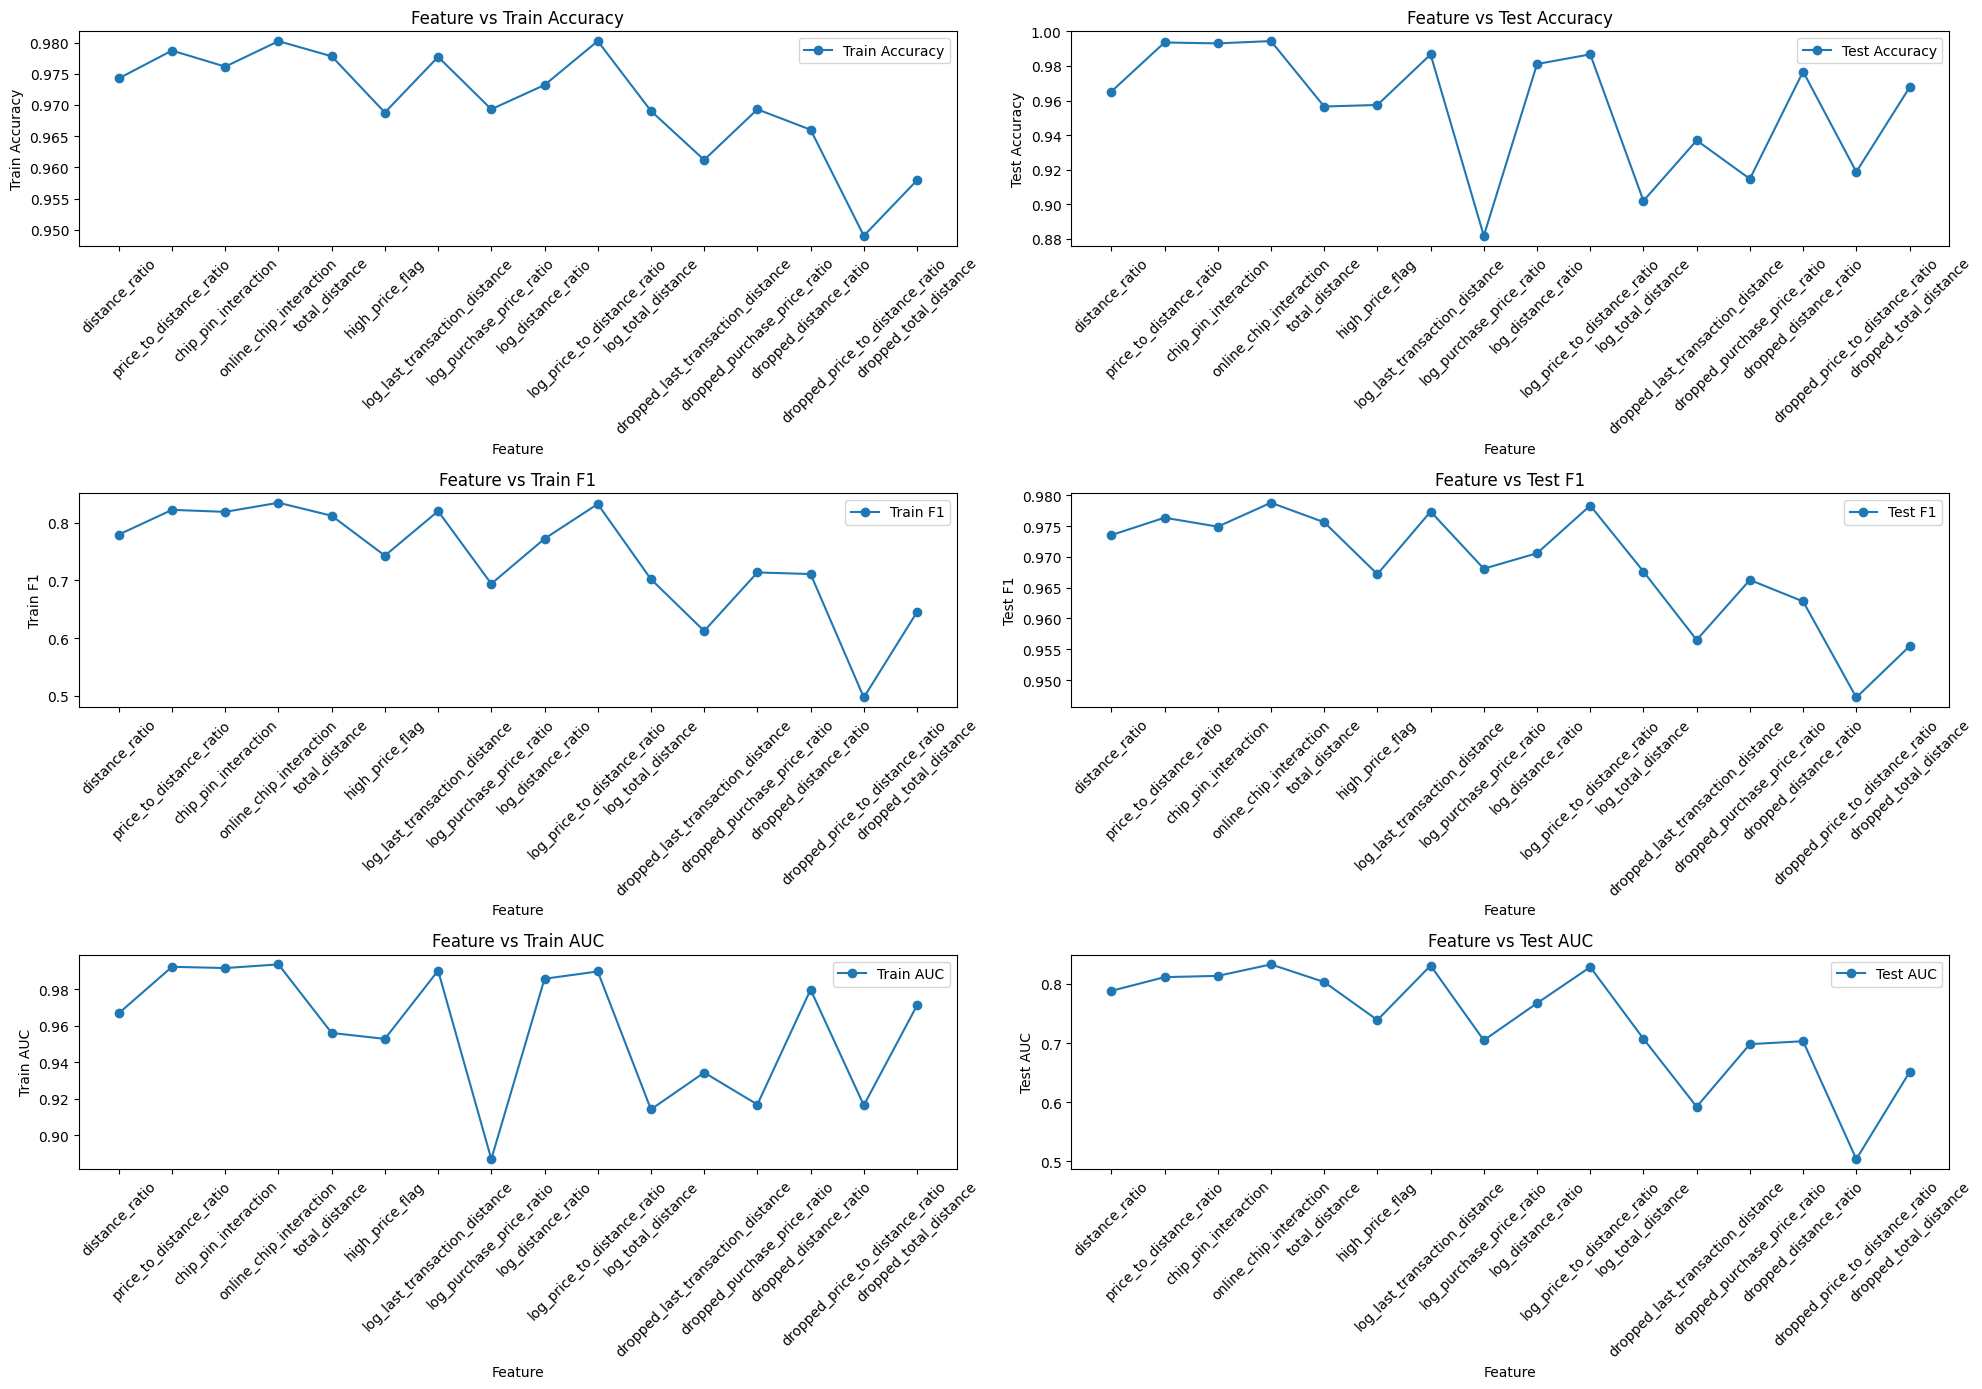

In [570]:
metrics = ['Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1', 'Train AUC', 'Test AUC']
plt.figure(figsize=(20, 14))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    plt.plot(df['Feature'], df[metric], marker='o', label=metric)
    plt.xticks(rotation=45)
    plt.xlabel('Feature')
    plt.ylabel(metric)
    plt.title(f'Feature vs {metric}')
    plt.legend()

plt.tight_layout()
plt.show()

The series of plots illustrates the impact of feature engineering on the generalization performance of the model, specifically focusing on Train Accuracy, Test Accuracy, Train F1 Score, Test F1 Score, Train AUC, and Test AUC. Here’s a summary of the findings based on the plots:

1. Impact of Feature Addition:

- Adding new features such as distance_ratio, log_last_transaction_distance, price_to_distance_ratio generally improved the model's test accuracy and F1 score, indicating that these features provided meaningful information that enhanced the model's predictive ability.
- However, some features (like log_purchase_price_ratio) showed a dip in both train and test performance metrics, suggesting they might not contribute significant discriminatory power or could introduce noise.

2. Effect of Feature Removal:

- Removing certain features, especially those derived from transformations (e.g., log_last_transaction_distance and log_price_to_distance_ratio), led to fluctuations in test performance, especially in AUC and F1 score, showing that these engineered features contributed to the model's ability to generalize.
- In particular, removing core features like total_distance caused a significant drop in test F1 and AUC, indicating its high relevance in identifying patterns of fraudulent transactions.

3. General Observations:

- The model performs best when combining key engineered features without excessive transformations or binary flags that don't contribute as much.
- The consistency in metrics such as Test AUC and Test F1 across many of the engineered features suggests that certain features improve the model's robustness in detecting true positives, essential for fraud detection.
  
In conclusion, carefully engineered features like ratios and logarithmic transformations of transactional metrics improved model generalization, whereas overly simplistic or redundant binary features added limited value. The best classifier maintained a high generalization performance when selecting key engineered features, optimizing the balance between complexity and interpretability.